In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!pip install ipython-autotime
%load_ext autotime

Mounted at /content/gdrive
time: 2.08 ms (started: 2021-01-14 09:21:23 +00:00)


In [ ]:
!mkdir data/
!cp "/content/gdrive/MyDrive/Colab Notebooks/NSF-SCC Project/Neighborhood Data/230-BG.csv" data/
!cp "/content/gdrive/MyDrive/Colab Notebooks/NSF-SCC Project/Neighborhood Data/Census_Variables.csv" data/
!cp -r "/content/gdrive/MyDrive/Colab Notebooks/NSF-SCC Project/Neighborhood Data/Census" data/


# !unzip '246-KCMO-ALL-Neighborhoods.zip' -d ./data/


time: 10.9 s (started: 2021-01-10 00:12:57 +00:00)


In [ ]:
!pip install CensusData

     |████████████████████████████████| 26.2MB 73.0MB/s 
  Created wheel for CensusData: filename=CensusData-1.11.post1-cp36-none-any.whl size=27905652 sha256=20d5a7001984fd9987c8e80f1c780518a34620d88f8702c17c8c280b3d6ba097
  Stored in directory: /root/.cache/pip/wheels/ae/1a/36/93bef02cb92cd74b5860adaa6316fcbd04e70f3c43dcbbddfe
Successfully built CensusData
time: 23.9 s (started: 2021-01-10 00:13:08 +00:00)


In [ ]:
import pandas as pd
import censusdata
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)
pd.options.display.float_format = '{:,}'.format

time: 53.5 ms (started: 2021-01-10 00:13:32 +00:00)


In [ ]:
BG_df = pd.read_csv('data/230-BG.csv')
TARGET_BGS = BG_df['BG_230'].apply(str).values.tolist()
TARGET_BGS

['290950003001',
 '290950006001',
 '290950006002',
 '290950006003',
 '290950006004',
 '290950007001',
 '290950007002',
 '290950007003',
 '290950007004',
 '290950008001',
 '290950008002',
 '290950008003',
 '290950008004',
 '290950009001',
 '290950009002',
 '290950009003',
 '290950009004',
 '290950010001',
 '290950010002',
 '290950010003',
 '290950011001',
 '290950011002',
 '290950018001',
 '290950018002',
 '290950018003',
 '290950018004',
 '290950019001',
 '290950019002',
 '290950019003',
 '290950019004',
 '290950020001',
 '290950020002',
 '290950021001',
 '290950021002',
 '290950021003',
 '290950021004',
 '290950022001',
 '290950022002',
 '290950022003',
 '290950023001',
 '290950023002',
 '290950034001',
 '290950034002',
 '290950034003',
 '290950034004',
 '290950037001',
 '290950038001',
 '290950038002',
 '290950043001',
 '290950043002',
 '290950044001',
 '290950044002',
 '290950046001',
 '290950046002',
 '290950046003',
 '290950051001',
 '290950051002',
 '290950052001',
 '290950052002

time: 44.6 ms (started: 2021-01-10 00:13:32 +00:00)


In [ ]:
census_result = censusdata.search('acs5', 2019, 'concept', 'Geography Specification')

census_result

[('for', 'Census API Geography Specification', "Census API FIPS 'for' clause"),
 ('in', 'Census API Geography Specification', "Census API FIPS 'in' clause"),
 ('ucgid',
  'Census API Geography Specification',
  'Uniform Census Geography Identifier clause')]

time: 247 ms (started: 2021-01-07 20:39:59 +00:00)


In [ ]:
censusdata.printtable(censusdata.censustable('acs5', 2017, 'B11001'))

Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B11001_001E  | HOUSEHOLD TYPE (INCLUDING LIVI | !! Estimate Total                                        | int  
B11001_002E  | HOUSEHOLD TYPE (INCLUDING LIVI | !! !! Estimate Total Family households                   | int  
B11001_003E  | HOUSEHOLD TYPE (INCLUDING LIVI | !! !! !! Estimate Total Family households Married-couple | int  
B11001_004E  | HOUSEHOLD TYPE (INCLUDING LIVI | !! !! !! Estimate Total Family households Other family   | int  
B11001_005E  | HOUSEHOLD TYPE (INCLUDING LIVI | !! !! !! !! Estimate Total Family households Other famil | int  
B11001_006E  | HOUSEHOLD TYPE (INCLUDING LIVI | !! !! !! !! Estimate Total Family households Other famil | int  
B11001_007E  | HOUSEHOLD TYPE (INCLUDING LIVI | !! !! Estimate Total Nonfamily households    

In [ ]:
all_counties = censusdata.geographies(censusdata.censusgeo([('state', '29'), ('county', '*')]), 'acs5', 2019)

all_counties_ID = []
for cty, geo in all_counties.items():
  all_counties_ID.append(geo.params()[1][1])
  # break
all_counties_ID = sorted(all_counties_ID)
all_counties_ID

['001',
 '003',
 '005',
 '007',
 '009',
 '011',
 '013',
 '015',
 '017',
 '019',
 '021',
 '023',
 '025',
 '027',
 '029',
 '031',
 '033',
 '035',
 '037',
 '039',
 '041',
 '043',
 '045',
 '047',
 '049',
 '051',
 '053',
 '055',
 '057',
 '059',
 '061',
 '063',
 '065',
 '067',
 '069',
 '071',
 '073',
 '075',
 '077',
 '079',
 '081',
 '083',
 '085',
 '087',
 '089',
 '091',
 '093',
 '095',
 '097',
 '099',
 '101',
 '103',
 '105',
 '107',
 '109',
 '111',
 '113',
 '115',
 '117',
 '119',
 '121',
 '123',
 '125',
 '127',
 '129',
 '131',
 '133',
 '135',
 '137',
 '139',
 '141',
 '143',
 '145',
 '147',
 '149',
 '151',
 '153',
 '155',
 '157',
 '159',
 '161',
 '163',
 '165',
 '167',
 '169',
 '171',
 '173',
 '175',
 '177',
 '179',
 '181',
 '183',
 '185',
 '186',
 '187',
 '189',
 '195',
 '197',
 '199',
 '201',
 '203',
 '205',
 '207',
 '209',
 '211',
 '213',
 '215',
 '217',
 '219',
 '221',
 '223',
 '225',
 '227',
 '229',
 '510']

time: 943 ms (started: 2021-01-08 03:02:23 +00:00)


In [ ]:
# censusdata.geographies(censusdata.censusgeo([('state', '29'), ('county', '095'),  ('block group', '*')]), 'acs5', 2019)


In [ ]:

# Full API variable list available here https://api.census.gov/data/2016/acs/acs5/variables/
categories = {
     'B01001_001E': 'Total population',
     'B19013_001E': 'Median income',
     'B25077_001E': 'Median home value',
     'B15011_001E': 'Total population age 25+ years with a bachelor\'s degree or higher',
     'B03002_003E': 'White alone',
     'B03002_004E': 'Black or African American alone',
    #  'B02001_004E': 'American Indian and Alaska Native Alone',
     'B03002_006E': 'Asian alone',
    #  'B03002_007E': 'Native Hawaiian and Other Pacific Islander alone',
    #  'B03002_008E': 'Other race',
    #  'B03002_009E': 'Two or more races',
     'B03002_012E': 'Hispanic or Latino',
     'B25002_003E': 'Total Vacant',
     'B25003_003E': 'Total Renter Occupied',
     'B11001_001E': 'Household_Type'
} #2013-above
TARGET_VARIABLES = list(categories.keys())[:]
[categories[x] for x in TARGET_VARIABLES]

# interest_df = pd.read_csv('data/Census_Variables.csv')
# interest_df = interest_df[interest_df['Name'].str.contains('DP') == False]
# interest_df.index = interest_df['Name']
# display(interest_df)

# TARGET_VARIABLES = interest_df['Name'].tolist()
# TARGET_LABELS = interest_df['Label'].tolist()
# TARGET_VARIABLES, TARGET_LABELS


['Total population']

time: 10.9 ms (started: 2021-01-08 03:48:16 +00:00)


In [ ]:
from tqdm.notebook import tqdm
TARGET_YEAR = 2013
master_df = pd.DataFrame()
for id in tqdm(all_counties_ID):
  download_df = censusdata.download('acs1', TARGET_YEAR, censusdata.censusgeo([('state', '29'), ('county', id), ('block group', '*')]),TARGET_VARIABLES)
  master_df = pd.concat([master_df, download_df], axis=0)
  break


'''
     'B01001_001E', # Total population
     'B19013_001E', # Median income
     'B25077_001E', # Median home value
     'B15011_001E', # Total population age 25+ years with a bachelor's degree or higher
     'B03002_003E', # Not Hispanic or Latino!!White alone
     'B03002_004E', # Not Hispanic or Latino!!Black or African American alone
     'B02001_004E', # American Indian and Alaska Native Alone
     'B03002_006E', # Not Hispanic or Latino!!Asian alone
     'B03002_007E', # Not Hispanic or Latino!!Native Hawaiian and Other Pacific Islander alone
     'B03002_008E', # Not Hispanic or Latino!!Some other race alone
     'B03002_009E', # Not Hispanic or Latino!!Two or more races
     'B03002_012E', # Hispanic or Latino
'''     
indices = master_df.index.tolist()
GEO_IDs = []
for idx in indices:
  state, county, tract, bg = idx.params()
  geo_id = state[1] + county[1] + tract[1] + bg[1]
  GEO_IDs.append(geo_id)
master_df.index = GEO_IDs
# master_df.columns = interest_df['Label'].tolist()
master_df.columns = [categories[x] for x in TARGET_VARIABLES]

display(master_df.head())

Unexpected response (URL: https://api.census.gov/data/2012/acs/acs1?get=NAME,B01001001&for=block+group:*&in=state:29+county:001): error: unknown/unsupported geography heirarchy 


ValueError: ignored

time: 290 ms (started: 2021-01-08 03:48:22 +00:00)


In [ ]:
master_df['BLOCKGROUP_ID'] = master_df.index
cols = master_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('BLOCKGROUP_ID')))
master_df = master_df.reindex(columns= cols)
TARGET_BGS_df = master_df.loc[master_df.index.isin(TARGET_BGS)]

TARGET_BGS_df

,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type
290950003001,290950003001,1777,24199,164000,235,644,477,202,180,55,510,741
290950006001,290950006001,1154,26932,62400,10,228,56,39,753,169,165,315
290950006002,290950006002,1095,31205,48200,32,215,39,0,841,111,184,413
290950006003,290950006003,679,17058,52800,20,146,0,88,408,116,67,261
290950006004,290950006004,1162,17452,53500,42,666,0,7,478,43,199,369
...,...,...,...,...,...,...,...,...,...,...,...,...
290950098002,290950098002,905,52313,120200,313,857,0,0,24,27,34,527
290950098003,290950098003,859,52155,123800,237,769,36,23,19,106,54,442
290950098004,290950098004,913,58250,133200,166,416,497,0,0,0,143,346
290950099001,290950099001,1523,58571,129200,352,969,379,0,104,0,290,692


time: 25.9 ms (started: 2021-01-08 03:32:08 +00:00)


In [ ]:
incomplete_df = TARGET_BGS_df.loc[TARGET_BGS_df[cols[1:]].values < 0].copy().drop_duplicates()
incomplete_index = incomplete_df.index
complete_df = TARGET_BGS_df.loc[TARGET_BGS_df.index.isin(incomplete_index) == False].copy().reset_index(drop=True).drop_duplicates()
incomplete_df = incomplete_df.reset_index(drop=True).drop_duplicates()
#.reset_index(drop=True).drop_duplicates()

display(complete_df)
display(incomplete_df)

len(incomplete_index)

,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type
0,290950003001,1777,24199,164000,235,644,477,202,180,55,510,741
1,290950006001,1154,26932,62400,10,228,56,39,753,169,165,315
2,290950006002,1095,31205,48200,32,215,39,0,841,111,184,413
3,290950006003,679,17058,52800,20,146,0,88,408,116,67,261
4,290950006004,1162,17452,53500,42,666,0,7,478,43,199,369
...,...,...,...,...,...,...,...,...,...,...,...,...
221,290950098002,905,52313,120200,313,857,0,0,24,27,34,527
222,290950098003,859,52155,123800,237,769,36,23,19,106,54,442
223,290950098004,913,58250,133200,166,416,497,0,0,0,143,346
224,290950099001,1523,58571,129200,352,969,379,0,104,0,290,692


,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type
0,290950154002,1251,9083,-666666666,0,128,981,0,15,96,463,480
1,290950172003,463,26000,-666666666,78,243,184,15,21,18,275,280
2,290959801011,0,-666666666,-666666666,0,0,0,0,0,0,0,0
3,290950095004,460,18032,-666666666,20,132,246,0,82,159,193,193


4

time: 52.1 ms (started: 2021-01-08 03:32:15 +00:00)


In [ ]:
!mkdir data/Census/$TARGET_YEAR
master_df.to_csv('data/Census/{}/BG_230_Census.csv'.format(TARGET_YEAR), index=False)
incomplete_df.to_csv('data/Census/{}/Census-corruptBG.csv'.format(TARGET_YEAR), index=False)
complete_df.to_csv('data/Census/{}/Census-validBG.csv'.format(TARGET_YEAR), index=False)



time: 149 ms (started: 2021-01-08 03:32:18 +00:00)


In [ ]:
!cp /content/BG_230_Census.csv "/content/gdrive/MyDrive/Colab Notebooks/NSF-SCC Project/Neighborhood Data/Census/$TARGET_YEAR"
!cp /content/Census-corruptBG.csv "/content/gdrive/MyDrive/Colab Notebooks/NSF-SCC Project/Neighborhood Data/Census/$TARGET_YEAR"
!cp /content/Census-validBG.csv "/content/gdrive/MyDrive/Colab Notebooks/NSF-SCC Project/Neighborhood Data/Census/$TARGET_YEAR"


time: 351 ms (started: 2021-01-08 03:32:21 +00:00)


In [ ]:
# https://api.census.gov/data/2019/acs/acs5/profile?get=DP02_0001E&for=state:01

time: 1.01 ms (started: 2021-01-07 20:47:08 +00:00)


In [ ]:
master_df.to_csv('BG_info.csv', index=False)

In [ ]:
valid_df = download_df[download_df['B07010_001E'].isnull() == False]
valid_df

KeyError: ignored

In [ ]:
state_data

NameError: ignored

In [ ]:
input()

# Handling Missing Data

In [ ]:
df_2019 = pd.read_csv('data/Census/2019/Census-corruptBG.csv')
df_2019.index = df_2019['BLOCKGROUP_ID']
df_2019

,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type
BLOCKGROUP_ID,,,,,,,,,,,,
290950019003,290950019003,717,18182,-666666666,38,349,43,0,325,82,229,294
290950057003,290950057003,687,-666666666,33800,34,31,598,0,40,55,79,237
290950057002,290950057002,425,26146,-666666666,0,10,379,0,12,179,142,184
290950154001,290950154001,999,25513,-666666666,11,93,764,70,68,22,219,252
290950010002,290950010002,1014,-666666666,168000,172,456,337,0,221,154,249,387
290950043001,290950043001,1102,-666666666,279200,282,454,420,114,52,86,377,475
290950034002,290950034002,401,-666666666,27900,10,84,309,0,0,168,60,122
290950175001,290950175001,578,-666666666,103900,75,376,194,1,4,32,89,246
290950095004,290950095004,428,26402,-666666666,24,29,369,0,23,162,190,190


time: 28.7 ms (started: 2021-01-08 03:04:02 +00:00)


In [ ]:
df_2019_alt = pd.DataFrame(columns = df_2019.columns)
missing_index = df_2019.index
for i in range(2018, 2012, -1):
  df = pd.read_csv('data/Census/{}/Census-validBG.csv'.format(str(i))).dropna()
  df.index = df['BLOCKGROUP_ID']
  alternative_data = df.loc[df.index.isin(missing_index)]
  df_2019_alt = pd.concat([df_2019_alt, alternative_data])
  # display(alternative_data)
  missing_index = [x for x in missing_index if x not in alternative_data.index]
  print('{}: substituted {} Block Groups\' Missing Data'.format(str(i), len(alternative_data)))
  if len(df_2019_alt) >= len(df_2019):
    break
  # break
df_2019_alt = df_2019_alt.drop_duplicates()
print(len(df_2019_alt), len(df_2019))


2018: substituted 21 Block Groups' Missing Data
2017: substituted 5 Block Groups' Missing Data
2016: substituted 4 Block Groups' Missing Data
2015: substituted 3 Block Groups' Missing Data
2014: substituted 3 Block Groups' Missing Data
2013: substituted 1 Block Groups' Missing Data
37 40


,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type
BLOCKGROUP_ID,,,,,,,,,,,,
290950095004,290950095004,428,26402,-666666666,24,29,369,0,23,162,190,190
290959801011,290959801011,0,-666666666,-666666666,0,0,0,0,0,0,0,0
290950154002,290950154002,1293,11920,-666666666,10,106,799,157,199,81,447,465


time: 80.8 ms (started: 2021-01-08 03:57:39 +00:00)


In [ ]:
df_2019_valid = pd.read_csv('data/Census/2019/Census-validBG.csv')
df_2019_valid.index = df_2019_valid['BLOCKGROUP_ID']
df_2019_valid = pd.concat([df_2019_valid, df_2019_alt])
# df_2019_valid.isnull().sum(axis = 1)

time: 12.2 ms (started: 2021-01-08 03:56:45 +00:00)


In [ ]:
is_NaN = df_2019_valid.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_2019_valid[row_has_NaN]

print(rows_with_NaN)

Empty DataFrame
Columns: [BLOCKGROUP_ID, Total population, Median income, Median home value, Total population age 25+ years with a bachelor's degree or higher, White alone, Black or African American alone, Asian alone, Hispanic or Latino, Total Vacant, Total Renter Occupied, Household_Type]
Index: []
time: 10.8 ms (started: 2021-01-08 03:56:46 +00:00)


In [ ]:
remaining_df = df_2019.loc[missing_index]
(remaining_df==0).sum(1)
remaining_df = remaining_df[(remaining_df==0).sum(1) < 4]
remaining_df

,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type
BLOCKGROUP_ID,,,,,,,,,,,,
290950095004,290950095004,428,26402,-666666666,24,29,369,0,23,162,190,190
290950154002,290950154002,1293,11920,-666666666,10,106,799,157,199,81,447,465


time: 19.7 ms (started: 2021-01-08 03:59:21 +00:00)


In [ ]:
df_2019_valid

,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type
290950171004,290950171004,1394,26042,60800,23,152,996,0,122,107,284,563
290950171002,290950171002,416,35066,43200,33,0,355,10,32,131,124,263
290950073002,290950073002,1389,68838,983100,577,1234,48,0,40,146,772,909
290950076001,290950076001,612,45000,55000,46,170,420,0,15,138,146,244
290950079002,290950079002,869,30325,55600,32,12,857,0,0,87,158,375
...,...,...,...,...,...,...,...,...,...,...,...,...
290950098001,290950098001,755,"40,789.0","109,000.0",205,333,333,35,45,0,393,416
290950019003,290950019003,418,23875,64700,37,88,59,0,240,137,141,235
290950034002,290950034002,444,26667,45200,19,34,290,0,103,117,136,174
290950167002,290950167002,1327,24103,185000,379,803,405,0,57,292,777,823


time: 23.7 ms (started: 2021-01-08 03:59:34 +00:00)


In [ ]:
df_2019_valid.to_csv('data/Census/2019/Census_validBG_fixed.csv', index = False)


time: 6.2 ms (started: 2021-01-08 06:18:22 +00:00)


In [ ]:
input()

KeyboardInterrupt: ignored

time: 2h 17min 56s (started: 2021-01-08 03:59:39 +00:00)


In [ ]:
!cp /content/data/Census/2019/Census_validBG_fixed.csv "/content/gdrive/MyDrive/Colab Notebooks/NSF-SCC Project/Neighborhood Data/Census/2019"

time: 124 ms (started: 2021-01-08 06:19:06 +00:00)


## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

time: 1.16 s (started: 2021-01-08 06:19:43 +00:00)


In [ ]:
import numpy as np 
df = df_2019_valid.drop(['BLOCKGROUP_ID'], axis = 1).reset_index(drop=True).astype(int)
# df = df_2019_valid.drop(['BLOCKGROUP_ID', 'Median home value'], axis = 1).reset_index(drop=True)

df.describe(include = 'all')

,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type
count,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0,227.0
mean,910.9955947136564,"48,862.396475770925","138,431.71365638767",224.88986784140968,385.2863436123348,343.88546255506606,23.229074889867842,129.29515418502203,88.22466960352423,225.3215859030837,409.72246696035245
std,381.3065625855042,"33,654.498252664096","144,980.61647209962",259.856650805173,385.1974116775972,329.97506624781477,43.504454461468015,199.1741936125083,64.65399883772803,193.36401917760713,199.09856050179565
min,290.0,"10,680.0","9,999.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0
25%,633.0,"27,764.0","50,550.0",38.0,88.5,62.0,0.0,17.0,42.5,103.0,270.5
50%,822.0,"40,102.0","86,300.0",99.0,241.0,289.0,2.0,53.0,84.0,169.0,375.0
75%,"1,110.0","56,282.0","171,700.0",374.0,610.5,522.5,29.0,158.5,128.0,299.0,494.5
max,"2,485.0","250,001.0","1,035,700.0","1,501.0","2,360.0","1,651.0",271.0,"1,276.0",382.0,"1,233.0","1,496.0"


time: 37.9 ms (started: 2021-01-08 07:03:36 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Median home value'], axis = 1).reset_index(drop=True)
y = df['Median home value'].reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

time: 10.5 ms (started: 2021-01-08 06:59:23 +00:00)


In [ ]:
for train_index, test_index in kf.split(df):
    model = LinearRegression()
    model.fit(X_train, y_train)

time: 40.1 ms (started: 2021-01-08 06:26:03 +00:00)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

time: 15 ms (started: 2021-01-08 06:59:36 +00:00)


In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Total population,39.84477896104182
Median income,3.7933834150506316
Total population age 25+ years with a bachelor's degree or higher,-119.23863153340494
White alone,44.14430434380067
Black or African American alone,-87.51149176785705
Asian alone,-4.974875198335672
Hispanic or Latino,-92.51147888429168
Total Vacant,143.34024709883528
Total Renter Occupied,336.09666412027525
Household_Type,-149.8782117049778


time: 11.8 ms (started: 2021-01-08 06:59:52 +00:00)


In [ ]:
y_pred = regressor.predict(X_test)
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).astype(int)
test_df.head()

,Actual,Predicted
130,133200,115365
83,323400,148635
158,94800,147068
184,33000,33784
76,44600,55065


time: 10.6 ms (started: 2021-01-08 07:00:59 +00:00)


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51799.07078892029
Mean Squared Error: 5259572337.238369
Root Mean Squared Error: 72522.90905112927
time: 9.34 ms (started: 2021-01-08 07:01:02 +00:00)


In [ ]:
X_missing = remaining_df.drop(['BLOCKGROUP_ID', 'Median home value'], axis = 1).reset_index(drop=True)
X_missing

,Total population,Median income,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type
0,428,26402,24,29,369,0,23,162,190,190
1,1293,11920,10,106,799,157,199,81,447,465


time: 18.3 ms (started: 2021-01-08 08:15:57 +00:00)


In [ ]:
remaining_df['Median home value'] = regressor.predict(X_missing).astype(int)
remaining_df

,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type
BLOCKGROUP_ID,,,,,,,,,,,,
290950095004,290950095004,428,26402,82704,24,29,369,0,23,162,190,190
290950154002,290950154002,1293,11920,46159,10,106,799,157,199,81,447,465


time: 19.8 ms (started: 2021-01-08 08:16:31 +00:00)


In [ ]:
df_2019_valid = pd.concat([df_2019_valid, remaining_df])
df_2019_valid

,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type
290950171004,290950171004,1394,26042,60800,23,152,996,0,122,107,284,563
290950171002,290950171002,416,35066,43200,33,0,355,10,32,131,124,263
290950073002,290950073002,1389,68838,983100,577,1234,48,0,40,146,772,909
290950076001,290950076001,612,45000,55000,46,170,420,0,15,138,146,244
290950079002,290950079002,869,30325,55600,32,12,857,0,0,87,158,375
...,...,...,...,...,...,...,...,...,...,...,...,...
290950034002,290950034002,444,26667,45200,19,34,290,0,103,117,136,174
290950167002,290950167002,1327,24103,185000,379,803,405,0,57,292,777,823
290950154001,290950154001,1105,17083,85000,21,93,721,63,222,84,231,257
290950095004,290950095004,428,26402,82704,24,29,369,0,23,162,190,190


time: 38.6 ms (started: 2021-01-08 08:38:57 +00:00)


In [ ]:
remaining_df.to_csv('data/Census/2019/Census_corruptBG_fixed.csv', index = False)
df_2019_valid.to_csv('data/Census/2019/Census_validBG_fixed.csv', index = False)


time: 12.9 ms (started: 2021-01-08 08:39:48 +00:00)


In [ ]:
!cp /content/data/Census/2019/Census_validBG_fixed.csv "/content/gdrive/MyDrive/Colab Notebooks/NSF-SCC Project/Neighborhood Data/Census/2019"
!cp /content/data/Census/2019/Census_corruptBG_fixed.csv "/content/gdrive/MyDrive/Colab Notebooks/NSF-SCC Project/Neighborhood Data/Census/2019"

time: 230 ms (started: 2021-01-08 08:40:06 +00:00)


# **Shape Extraction**

In [ ]:
!mkdir data/
!cp "/content/gdrive/MyDrive/Colab Notebooks/NSF-SCC Project/Neighborhood Data/BG_Core_N230.convert.json" /content/data/

time: 627 ms (started: 2021-01-08 19:55:30 +00:00)


In [ ]:
import json
with open('data/BG_Core_N230.convert.json') as f:
  annotations = json.load(f)
annotations

In [ ]:
# annotations['features'][0]['properties']['description']
valid_bg = df_2019_valid.index.astype(str)
shape_list = []
for bg in valid_bg:
  for ann in annotations['features']:
    description = ann['properties']['description']
    GEO_ID_idx = description.find('GEOID10')
    GEO_ID = description[GEO_ID_idx+18: GEO_ID_idx+30]
    if GEO_ID == bg:
    # print(GEO_ID)
      polygon = [[x[1], x[0]] for x in ann['geometry']['coordinates'][0][0]]
      # print(polygon)
      shape_list.append(polygon)
    # display(df_2019_valid[df_2019_valid.index == int(GEO_ID)])
  # break
df_2019_valid['Boundaries'] = shape_list
df_2019_valid

,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type,Boundaries
290950171004,290950171004,1394,26042,60800,23,152,996,0,122,107,284,563,"[[39.0528659999989, -94.530621], [39.054686999..."
290950171002,290950171002,416,35066,43200,33,0,355,10,32,131,124,263,"[[39.0346469999989, -94.529258], [39.034522999..."
290950073002,290950073002,1389,68838,983100,577,1234,48,0,40,146,772,909,"[[39.0422569999989, -94.588032], [39.042340999..."
290950076001,290950076001,612,45000,55000,46,170,420,0,15,138,146,244,"[[39.03502699999891, -94.564013], [39.03413999..."
290950079002,290950079002,869,30325,55600,32,12,857,0,0,87,158,375,"[[39.02616699999891, -94.544818], [39.02620199..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290950034002,290950034002,444,26667,45200,19,34,290,0,103,117,136,174,"[[39.07611199999889, -94.521896], [39.07609799..."
290950167002,290950167002,1327,24103,185000,379,803,405,0,57,292,777,823,"[[39.05669599999889, -94.589458], [39.05665899..."
290950154001,290950154001,1105,17083,85000,21,93,721,63,222,84,231,257,"[[39.10169199999887, -94.563407], [39.10168099..."
290950095004,290950095004,428,26402,82704,24,29,369,0,23,162,190,190,"[[38.97581799999894, -94.576338], [38.97574399..."


time: 161 ms (started: 2021-01-08 09:03:52 +00:00)


In [ ]:
df_2019_valid

,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type,Boundaries
290950171004,290950171004,1394,26042,60800,23,152,996,0,122,107,284,563,"[[39.0528659999989, -94.530621], [39.054686999..."
290950171002,290950171002,416,35066,43200,33,0,355,10,32,131,124,263,"[[39.0346469999989, -94.529258], [39.034522999..."
290950073002,290950073002,1389,68838,983100,577,1234,48,0,40,146,772,909,"[[39.0422569999989, -94.588032], [39.042340999..."
290950076001,290950076001,612,45000,55000,46,170,420,0,15,138,146,244,"[[39.03502699999891, -94.564013], [39.03413999..."
290950079002,290950079002,869,30325,55600,32,12,857,0,0,87,158,375,"[[39.02616699999891, -94.544818], [39.02620199..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290950034002,290950034002,444,26667,45200,19,34,290,0,103,117,136,174,"[[39.07611199999889, -94.521896], [39.07609799..."
290950167002,290950167002,1327,24103,185000,379,803,405,0,57,292,777,823,"[[39.05669599999889, -94.589458], [39.05665899..."
290950154001,290950154001,1105,17083,85000,21,93,721,63,222,84,231,257,"[[39.10169199999887, -94.563407], [39.10168099..."
290950095004,290950095004,428,26402,82704,24,29,369,0,23,162,190,190,"[[38.97581799999894, -94.576338], [38.97574399..."


time: 108 ms (started: 2021-01-08 09:06:56 +00:00)


In [ ]:
df_2019_valid.to_csv('data/Census/2019/Census_validBG_withshapes.csv', index = False)
!cp /content/data/Census/2019/Census_validBG_withshapes.csv "/content/gdrive/MyDrive/Colab Notebooks/NSF-SCC Project/Neighborhood Data/Census/2019"


time: 154 ms (started: 2021-01-08 09:04:39 +00:00)


# Connect with 311 & Cluster

In [ ]:
!wget --content-disposition https://public.boxcloud.com/d/1/b1!ASQD9_d5J5cynMxxF-vdkCXTBQ3baZDLHxNxvn080seXRA30z0qtBeY1HzP_xZMmrHxV8JZD-KVmbD2nSB-1wrnk4xkPgIBCPriWSv3yU6HQAfHKCsJt_De0vPdX68OQpofEbAg7zbN738ON9JCLo3rkDKPJ6sYp96YCAsj89B2ho7DzdMFgc4hmCOH4CEM_q0FK1V2ZaAUAw5sQqvjrm84zn8gCB05AGdOeyzAzXXhQAjRyoNGwY8sWbAAYm4XiEvLZ6Mbw0IYDJxCnqqrj1fNqU7cUHQHDnu8vYu7f4wUbDsFaCH9gysC-PSTY1_kAzjoXzHCbA50p57ufF4q5J3s3FY_Wzx0qripoAqg5istJ5F3RvRVsP5GMjixSqvAUH4DFp1C_2GxBHawX6nPlkWdEzRYxmWIAJVX0oGHkYhBVdMhoOwvdXQtfojzCawirIIo2gh3aT9s7132V2s0lQhkDKwU2po_SxDC47ZZiVsGEpfKb61vGetzLTiDdtAVBAa4V1IPZRjhekPAYUnorSDYuMTGni3pW1coMbD9arUnytfJPUpJjCHwQA9Sa8syfKXr-I6Xi9LppAVsyef2CThehWlkboqiDoQzby1VUqGmqZT4tgAiMwK-0QX__1wYiovn_6qWkQVz211wZlsgXoIdMpTGujeL6YJpml214_Yjm3b5zoCVIOD40uF04FBAY5J29U49m49VOX_wTIkH_VLA8NxUhQsoJZgMog9yAH7hLrLWdKBt5Pd71JkfCb6zvPqjKJM4i84_2O3rPuKY9U0zbD9PcepNWyDAeq3aYA5S-0G_dHpvqRoVNN2RSTdqcswFh-bw8xkZhpkMGH8N40Cw2VgQq1sNShiHOjVrxW7BBFxygoKSacrfOpuSOTFXohyTiMaKOcOUqHzryyFh_a5Helb5hCF8QTgrbfhO3p6JEHwE0oO1dm-cWcsoRObxSsuJc6HxxkrSFAxSL-FEKEiI-v51tCxAku_dtjZdYTeRtxUezugHiDY-Vwv-rROblWG9EL8nnbE1kt6RHtR_EILiK2GgT4WScKu8jYzJrV0_NdGAWlDVnFznrYaPOBzqTB9cdGyRPMxmrAEfY5P91VqT9lhwvX-cam3wC6jR1_43kRrs_Hun68WGJAv2nsHaZ3iVfsgRgXjdUw_JIwRbNACxOi1e_ZFom-fZQEJet_USE-qWRVrvegDmVklwrYWZElTKmqXz8MaS7xU5ENYtUyOUjP3d8aT35QJj-UonaU7xZrSmwVoRAp-lHoUuqdjvzK8_cuIRY6mvzxxF26G9-g54QaEQqZjjZZ2XuGQ1kNpvTwLcNBwpsRtLUDQ6Yiv2sOqhbNcGLtkg_crfMe7kBDtpQuP7ZjDdhFxB0raFQgkMz2kkzV5zoMW7ro1H0FPxbPTnXkO6kXlWq3D2D11YeXvuZfkMMYTroM_8YguAxciHvEnhSBA../download

--2021-01-10 01:56:26--  https://public.boxcloud.com/d/1/b1!ASQD9_d5J5cynMxxF-vdkCXTBQ3baZDLHxNxvn080seXRA30z0qtBeY1HzP_xZMmrHxV8JZD-KVmbD2nSB-1wrnk4xkPgIBCPriWSv3yU6HQAfHKCsJt_De0vPdX68OQpofEbAg7zbN738ON9JCLo3rkDKPJ6sYp96YCAsj89B2ho7DzdMFgc4hmCOH4CEM_q0FK1V2ZaAUAw5sQqvjrm84zn8gCB05AGdOeyzAzXXhQAjRyoNGwY8sWbAAYm4XiEvLZ6Mbw0IYDJxCnqqrj1fNqU7cUHQHDnu8vYu7f4wUbDsFaCH9gysC-PSTY1_kAzjoXzHCbA50p57ufF4q5J3s3FY_Wzx0qripoAqg5istJ5F3RvRVsP5GMjixSqvAUH4DFp1C_2GxBHawX6nPlkWdEzRYxmWIAJVX0oGHkYhBVdMhoOwvdXQtfojzCawirIIo2gh3aT9s7132V2s0lQhkDKwU2po_SxDC47ZZiVsGEpfKb61vGetzLTiDdtAVBAa4V1IPZRjhekPAYUnorSDYuMTGni3pW1coMbD9arUnytfJPUpJjCHwQA9Sa8syfKXr-I6Xi9LppAVsyef2CThehWlkboqiDoQzby1VUqGmqZT4tgAiMwK-0QX__1wYiovn_6qWkQVz211wZlsgXoIdMpTGujeL6YJpml214_Yjm3b5zoCVIOD40uF04FBAY5J29U49m49VOX_wTIkH_VLA8NxUhQsoJZgMog9yAH7hLrLWdKBt5Pd71JkfCb6zvPqjKJM4i84_2O3rPuKY9U0zbD9PcepNWyDAeq3aYA5S-0G_dHpvqRoVNN2RSTdqcswFh-bw8xkZhpkMGH8N40Cw2VgQq1sNShiHOjVrxW7BBFxygoKSacrfOpuSOTFXohyTiMaKOcOUqHzryyFh_a5Helb5hCF8QTgrbfhO3p6JE

In [ ]:
!cp 

In [ ]:
import pandas as pd
df_2019_valid = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/NSF-SCC Project/Neighborhood Data/Census/2019/Census_validBG_withshapes.csv')
df_311 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/NSF-SCC Project/Neighborhood Data/ALL-311_ALL_BG_1-21_230BG_v1.csv')
df_311 = df_311.drop(['Right_GEOID10', 'BG_230_IN', 'GEOID10'], axis = 1)
df_311.head()


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SOURCE,CATEGORY,TYPE,CATTYPE,GROUP311,VIS_STREET,DETAIL,STATUS,COUNTY,LATITUDE,LONGITUDE,CASE ID,DEPARTMENT,WORK GROUP,REQUEST TYPE,CREATION DATE,CREATION TIME,CREATION MONTH,CREATION YEAR,EXCEEDED EST TIMEFRAME,CLOSED DATE,CLOSED MONTH,CLOSED YEAR,DAYS TO CLOSE,STREET ADDRESS,ADDRESS WITH GEOCODE,ZIP CODE,NEIGHBORHOOD,COUNCIL DISTRICT,POLICE DISTRICT,PARCEL ID NO,CASE URL,30-60-90 Days Open Window,nbhid,nbhname,BLKGRPID
0,PHONE,Air Quality,Pollutants,Air Quality Pollutants,ENVIR_HEALTH_SAFETY,NOT_VISIBLE,Outdoor,RESOL,Cass,38.842442,-94.544306,2012019009,Health,Health-Air Quality-,Outdoor Air Quality,02/16/2012,10:52 AM,2,2012,Y,02/21/2012,2.0,2012.0,5.0,15615 Kensington Ave,"15615 Kensington Ave64147\n(38.842442, -94.544...",64147.0,Richards Gebaur,6.0,South,75011,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN,186,Richards Gebaur,290370601001
1,PHONE,Animal,Other,Animal Other,ANIMAL,NOT_VISIBLE,Non Emergency,RESOL,Cass,38.842116,-94.549310,2010203179,NHS,NHS-Animal Health and Safety-,Animal Control,06/02/2010,11:28 AM,6,2010,N,06/03/2010,6.0,2010.0,1.0,3411 E 155TH TER,"3411 E 155TH TER64147\n(38.842116, -94.54931)",64147.0,Richards Gebaur,6.0,South,254082,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN,186,Richards Gebaur,290370601001
2,PHONE,Animal,Other,Animal Other,ANIMAL,NOT_VISIBLE,Non Emergency,RESOL,Cass,38.843702,-94.550838,2010281391,NHS,NHS-Animal Health and Safety-,Animal Control,08/04/2010,08:37 AM,8,2010,Y,08/09/2010,8.0,2010.0,5.0,15426 ANDREWS RD,"15426 ANDREWS RD64147\n(38.843702, -94.550838)",64147.0,Richards Gebaur,6.0,South,75016,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN,186,Richards Gebaur,290370601001
3,PHONE,Animal,Owned or Stray at Large,Animal Owned or Stray at Large,ANIMAL,VISIBLE,All,RESOL,Cass,38.838331,-94.548283,2012130211,NHS,NHS-Animal Health and Safety-,Animal At Large,09/17/2012,01:07 PM,9,2012,N,09/18/2012,9.0,2012.0,1.0,15800 Calvary Rd,"15800 Calvary Rd64147\n(38.838331, -94.548283)",64147.0,Richards Gebaur,6.0,South,254081,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN,186,Richards Gebaur,290370601001
4,PHONE,Animal,Stray Confined,Animal Stray Confined,ANIMAL,NOT_VISIBLE,Confined,RESOL,Cass,38.838331,-94.548283,2014026757,NHS,NHS-Animal Health and Safety-,Stray Animal Confined,03/04/2014,07:47 AM,3,2014,N,03/04/2014,3.0,2014.0,0.0,15800 Calvary Rd,"15800 Calvary Rd64147\n(38.838331, -94.548283)",64147.0,Richards Gebaur,6.0,South,254081,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN,186,Richards Gebaur,290370601001


time: 24.4 s (started: 2021-01-10 22:37:22 +00:00)


0      [[39.0528659999989, -94.530621], [39.054686999...
1      [[39.0346469999989, -94.529258], [39.034522999...
2      [[39.0422569999989, -94.588032], [39.042340999...
3      [[39.03502699999891, -94.564013], [39.03413999...
4      [[39.02616699999891, -94.544818], [39.02620199...
                             ...                        
224    [[39.07611199999889, -94.521896], [39.07609799...
225    [[39.05669599999889, -94.589458], [39.05665899...
226    [[39.10169199999887, -94.563407], [39.10168099...
227    [[38.97581799999894, -94.576338], [38.97574399...
228    [[39.09610399999887, -94.568635], [39.09608499...
Name: Boundaries, Length: 229, dtype: object

time: 7.28 ms (started: 2021-01-10 22:38:23 +00:00)


In [ ]:
# sample_df = df_311.sample(n=10000, random_state=1).reset_index(drop=True).copy()
sample_df = df_311.copy()
sample_df = sample_df[sample_df['DAYS TO CLOSE'].notna()].reset_index(drop=True)
sample_df

,SOURCE,CATEGORY,TYPE,CATTYPE,GROUP311,VIS_STREET,DETAIL,STATUS,COUNTY,LATITUDE,LONGITUDE,CASE ID,DEPARTMENT,WORK GROUP,REQUEST TYPE,CREATION DATE,CREATION TIME,CREATION MONTH,CREATION YEAR,EXCEEDED EST TIMEFRAME,CLOSED DATE,CLOSED MONTH,CLOSED YEAR,DAYS TO CLOSE,STREET ADDRESS,ADDRESS WITH GEOCODE,ZIP CODE,NEIGHBORHOOD,COUNCIL DISTRICT,POLICE DISTRICT,PARCEL ID NO,CASE URL,30-60-90 Days Open Window,nbhid,nbhname,BLKGRPID
0,PHONE,Air Quality,Pollutants,Air Quality Pollutants,ENVIR_HEALTH_SAFETY,NOT_VISIBLE,Outdoor,RESOL,Cass,38.842442,-94.544306,2012019009,Health,Health-Air Quality-,Outdoor Air Quality,02/16/2012,10:52 AM,2,2012,Y,02/21/2012,2.0,2012.0,5.0,15615 Kensington Ave,"15615 Kensington Ave64147\n(38.842442, -94.544...",64147.0,Richards Gebaur,6.0,South,75011,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN,186,Richards Gebaur,290370601001
1,PHONE,Animal,Other,Animal Other,ANIMAL,NOT_VISIBLE,Non Emergency,RESOL,Cass,38.842116,-94.549310,2010203179,NHS,NHS-Animal Health and Safety-,Animal Control,06/02/2010,11:28 AM,6,2010,N,06/03/2010,6.0,2010.0,1.0,3411 E 155TH TER,"3411 E 155TH TER64147\n(38.842116, -94.54931)",64147.0,Richards Gebaur,6.0,South,254082,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN,186,Richards Gebaur,290370601001
2,PHONE,Animal,Other,Animal Other,ANIMAL,NOT_VISIBLE,Non Emergency,RESOL,Cass,38.843702,-94.550838,2010281391,NHS,NHS-Animal Health and Safety-,Animal Control,08/04/2010,08:37 AM,8,2010,Y,08/09/2010,8.0,2010.0,5.0,15426 ANDREWS RD,"15426 ANDREWS RD64147\n(38.843702, -94.550838)",64147.0,Richards Gebaur,6.0,South,75016,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN,186,Richards Gebaur,290370601001
3,PHONE,Animal,Owned or Stray at Large,Animal Owned or Stray at Large,ANIMAL,VISIBLE,All,RESOL,Cass,38.838331,-94.548283,2012130211,NHS,NHS-Animal Health and Safety-,Animal At Large,09/17/2012,01:07 PM,9,2012,N,09/18/2012,9.0,2012.0,1.0,15800 Calvary Rd,"15800 Calvary Rd64147\n(38.838331, -94.548283)",64147.0,Richards Gebaur,6.0,South,254081,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN,186,Richards Gebaur,290370601001
4,PHONE,Animal,Stray Confined,Animal Stray Confined,ANIMAL,NOT_VISIBLE,Confined,RESOL,Cass,38.838331,-94.548283,2014026757,NHS,NHS-Animal Health and Safety-,Stray Animal Confined,03/04/2014,07:47 AM,3,2014,N,03/04/2014,3.0,2014.0,0.0,15800 Calvary Rd,"15800 Calvary Rd64147\n(38.838331, -94.548283)",64147.0,Richards Gebaur,6.0,South,254081,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN,186,Richards Gebaur,290370601001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472367,PHONE,Zoning,Investigation,Zoning Investigation,PERMITS_ZONING,VISIBLE,All,RESOL,Platte,39.329793,-94.622004,2008247386,City Planning and Development,City Planning and Development-Permit Compliance-,Zoning Inspections and Violations,10/03/2008,02:18 PM,10,2008,Y,12/10/2008,12.0,2008.0,68.0,13100 N Robinhood Ln,"13100 N Robinhood Ln64164\n(39.329793, -94.622...",64164.0,KCI & 2nd Creek,2.0,North,252799,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN,231,KCI & 2nd Creek,291650306006
1472368,WEB,Zoning,Investigation,Zoning Investigation,PERMITS_ZONING,VISIBLE,All,RESOL,Platte,39.326928,-94.644055,2010259813,City Planning and Development,City Planning and Development-Permit Compliance-,Zoning Inspections and Violations,07/16/2010,01:52 PM,7,2010,Y,11/17/2010,11.0,2010.0,124.0,12801 NW SKYVIEW AVE,"12801 NW SKYVIEW AVE64164\n(39.326928, -94.644...",64164.0,KCI & 2nd Creek,2.0,North,171277,http://city.kcmo.org/kc/ActionCenterRequest/Ca...,NaN,231,KCI & 2nd Creek,291650306006
1472369,WEB,Zoning,Investigation,Zoning Investigation,PERMITS_ZONING,VISIBLE,All,RESOL,Platte,39.326928,-94.644055,2010367523,City Planning and Development,City Planning and Development-Permit Compliance-,Zoning Inspections and Violations,11/17/2010,01:31 PM,11,2010,N,12/01/2010,12.0,2010.0,14.0,12801 NW SKYVIEW AV

time: 1.37 s (started: 2021-01-10 22:39:09 +00:00)


##Group By Call Category



In [ ]:
'''
Group By Call Category
'''
call_df = sample_df.groupby(['CATEGORY', 'BLKGRPID']).size()
call_df = call_df.unstack(level = 0).fillna(0).astype(int) #level = 1 will swap column and row
#call_df['Total'] = call_df.sum(axis=1)#; call_df.loc['Total'] = call_df.sum()
# call_df[call_df.columns] = call_df[call_df.columns].applymap(int)
call_df = call_df.loc[:,"Air Quality":"Zoning"].div(call_df.sum(axis=1), axis=0)
call_df = call_df.merge(df_2019_valid, how='inner', left_on='BLKGRPID', right_on='BLOCKGROUP_ID')#.drop(columns=['Neighborhood Number'])
call_df.index = call_df['BLOCKGROUP_ID']
# call_df.loc[:,"Air Quality":"Zoning"] = temp_df*100

call_df

,Air Quality,Animal,Animals / Pets,Aviation,Boulevard Parks and Rec,Bridge,Bulky Appointment,Capital Projects,City Clerks Office,City Facilities,City Managers Office,City Planning & Development,Cleaning,Consumer Services,Convention & Entertainment Center,Data Not Available,Ditch,Downtown Parking,Facilities,Finance,Fire,Food Protection,Government,Graffiti,Guard Rail,Health,Housing,Information Request,Information Technology,Law,Lights / Signals,Maintenance,Markings,Mayors Office,Mowing / Weeds,Municipal Court,Neighborhood & Community Services,Neighborhood Preservation,Noise Control,Nuisance Violations,...,Sidewalks / Curbs / Ditch,Signal,Signs,Snow & Ice,Steel Plate,Storm Water,Storm Water / Sewer,Street,Street Light,Street Sign,Streets / Roadways / Alleys,Sweeping,Traffic Sign,Traffic Study,Trash,Trash / Recycling,Trees,Vehicle,Vehicles / Parking,Wastewater,Water,Water Leak,Water Main Break,Water Quality,Water Services,Weeds,Zoning,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type,Boundaries
BLOCKGROUP_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
290950003001,0.001205,0.046577,0.028308,0.0,0.0,0.000803,0.008834,0.002008,0.0,0.000402,0.001205,0.0,0.005822,0.000803,0.0,0.000201,0.000201,0.001606,0.000201,0.0,0.000402,0.001606,0.002208,0.003614,0.000201,0.002208,0.0,0.0,0.0,0.0,0.019072,0.005421,0.001405,0.0,0.015057,0.0,0.001004,0.001004,0.000602,0.018269,...,0.004618,0.002610,0.015660,0.004818,0.000602,0.011443,0.015459,0.000402,0.021682,0.010440,0.044369,0.000000,0.004216,0.003614,0.146155,0.149769,0.048183,0.022887,0.020679,0.0,0.028709,0.035937,0.000000,0.001405,0.003413,0.004015,0.003011,290950003001,1524,27778.0,165800.0,332,742,502,63,208,89,540,730,"[[39.10841799999887, -94.567435], [39.10850499..."
290950006001,0.000508,0.094416,0.058883,0.0,0.0,0.000000,0.017513,0.000254,0.0,0.000000,0.000254,0.0,0.006599,0.001523,0.0,0.000254,0.000254,0.000254,0.000000,0.0,0.000000,0.001523,0.000254,0.011675,0.000254,0.000761,0.0,0.0,0.0,0.0,0.006599,0.004061,0.000254,0.0,0.013959,0.0,0.000000,0.001015,0.000254,0.016244,...,0.002030,0.002030,0.009137,0.007868,0.001777,0.007360,0.012183,0.000254,0.010406,0.005584,0.017766,0.000000,0.003046,0.003046,0.087817,0.096193,0.071574,0.033249,0.049492,0.0,0.026396,0.037056,0.000000,0.001015,0.001523,0.005076,0.001269,290950006001,1237,26500.0,56700.0,36,405,0,253,567,86,227,418,"[[39.11992799999887, -94.51357], [39.120062999..."
290950006002,0.000752,0.091610,0.056057,0.0,0.0,0.000000,0.012792,0.002069,0.0,0.000000,0.001129,0.0,0.007148,0.000941,0.0,0.001505,0.000000,0.000000,0.000000,0.0,0.000188,0.000188,0.001129,0.015613,0.000000,0.003762,0.0,0.0,0.0,0.0,0.003386,0.004515,0.000000,0.0,0.007901,0.0,0.000941,0.001505,0.000188,0.032355,...,0.004138,0.003198,0.008089,0.004703,0.000564,0.004515,0.009970,0.000000,0.006772,0.004703,0.014861,0.000376,0.001505,0.002634,0.091798,0.082769,0.054929,0.035741,0.049850,0.0,0.025771,0.031791,0.000188,0.000941,0.001693,0.004327,0.001881,290950006002,1953,37157.0,42300.0,72,677,423,96,739,214,311,532,"[[39.10884399999888, -94.518821], [39.10882099..."
290950006003,0.000464,0.088781,0.059342,0.0,0.0,0.000000,0.010663,0.001623,0.0,0.000000,0.001159,0.0,0.011590,0.000000,0.0,0.001159,0.000000,0.000695,0.000000,0.0,0.000464,0.003941,0.000695,0.010663,0.000000,0.004636,0.0,0.0,0.0,0.0,0.007650,0.005331,0.000000,0.0,0.010895,0.0,0.000464,0.001623,0.001854,0.028512,...,0.006954,0.001623,0.015763,0.002550,0.000695,0.013445,0.012749,0.000000,0.008113,0.003941,0.024571,0.000000,0.003709,0.002318,0.091794,0.087158,0.046824,0.025962,0.033611,0.0,0.024339,0.030598,0.000000,0.000695,0.001391,0.006027,0.006722,290950006003,445,56150.0,46900.0,9,40,0,11,394,80,73,117,"[[39.10884599999886, -94.518905], [39.10854399..."
290950006004,0.0002

time: 343 ms (started: 2021-01-10 22:39:12 +00:00)


##Group By Response Time



In [ ]:
import plotly.express as px
import numpy as np
from tqdm.notebook import tqdm
RESPONSE_THRESHOLD = {
    0: 'On time (0-day delay)',
    1: '1 day',
    2: '2 days',
    7: '7-day window',
    14: '14-day window',
    30: '30-day window',
    60: '60-day window',
    90: '90-day window',
    120: '120-day window',
    180: '180-day window',
    365: '365-day window', 
    4525: '365+ -day window'
    }

# response_count_df = sample_df['DAYS TO CLOSE'].to_frame('DAYS') 
# response_count_df.head()
# counts, bins = np.histogram(response_count_df['DAYS'], bins=list(RESPONSE_THRESHOLD.keys()))
# bins = 0.5 * (bins[:-1] + bins[1:])
# fig = px.bar(x=bins, y=counts, labels={'x':'DAYS', 'y':'count'})
# fig.show()

new_days_to_close = []
for index, row in tqdm(sample_df.iterrows(), total = sample_df.shape[0]):
  old_days = row['DAYS TO CLOSE']
  temp = len(new_days_to_close)
  # print(old_days)
  for lim in RESPONSE_THRESHOLD:
    if old_days <= lim:
      # print(RESPONSE_THRESHOLD[lim])
      new_days_to_close.append(RESPONSE_THRESHOLD[lim])
      break
  if temp == len(new_days_to_close):
    display(row)
  # break
sample_df['DAYS TO CLOSE (NEW)'] = new_days_to_close
sample_df[['DAYS TO CLOSE','DAYS TO CLOSE (NEW)']].head()

,DAYS TO CLOSE,DAYS TO CLOSE (NEW)
0,5.0,7-day window
1,1.0,1 day
2,5.0,7-day window
3,1.0,1 day
4,0.0,On time (0-day delay)


time: 2min 31s (started: 2021-01-10 22:39:15 +00:00)


In [ ]:
'''
Group By Response Time Category
'''
response_df = sample_df.groupby(['DAYS TO CLOSE (NEW)', 'BLKGRPID']).size()
response_df= response_df.unstack(level = 0).fillna(0).astype(int) #level = 1 will swap column and row
response_df = response_df[RESPONSE_THRESHOLD.values()] 
# response_df.columns = response_df.columns.astype(str)

response_df = response_df.div(response_df.sum(axis=1), axis=0) #normalize by total number of calls
response_df = response_df.merge(df_2019_valid, how='inner', left_on='BLKGRPID', right_on='BLOCKGROUP_ID')#.drop(columns=['Neighborhood Number'])
response_df.index = response_df['BLOCKGROUP_ID']

response_df

,On time (0-day delay),1 day,2 days,7-day window,14-day window,30-day window,60-day window,90-day window,120-day window,180-day window,365-day window,365+ -day window,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type,Boundaries
BLOCKGROUP_ID,,,,,,,,,,,,,,,,,,,,,,,,,
290950003001,0.120659,0.254768,0.093756,0.205983,0.091347,0.078298,0.055812,0.022285,0.012849,0.017667,0.025898,0.020679,290950003001,1524,27778.0,165800.0,332,742,502,63,208,89,540,730,"[[39.10841799999887, -94.567435], [39.10850499..."
290950006001,0.104061,0.208883,0.073604,0.207614,0.079949,0.071574,0.052284,0.030711,0.029695,0.033756,0.049492,0.058376,290950006001,1237,26500.0,56700.0,36,405,0,253,567,86,227,418,"[[39.11992799999887, -94.51357], [39.120062999..."
290950006002,0.100828,0.195636,0.055117,0.223476,0.075621,0.069037,0.045899,0.040068,0.019752,0.034989,0.059631,0.079947,290950006002,1953,37157.0,42300.0,72,677,423,96,739,214,311,532,"[[39.10884399999888, -94.518821], [39.10882099..."
290950006003,0.099675,0.213723,0.067223,0.209550,0.079509,0.064673,0.050997,0.031757,0.015994,0.038479,0.060501,0.067918,290950006003,445,56150.0,46900.0,9,40,0,11,394,80,73,117,"[[39.10884599999886, -94.518905], [39.10854399..."
290950006004,0.093110,0.214678,0.064154,0.217424,0.082876,0.067399,0.046930,0.032701,0.029705,0.033450,0.056166,0.061408,290950006004,767,34038.0,30100.0,0,159,86,50,452,92,85,330,"[[39.11234499999888, -94.515196], [39.11230399..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290950175001,0.093802,0.268725,0.078727,0.179708,0.083752,0.073463,0.063652,0.036851,0.026801,0.023211,0.036851,0.034458,290950175001,536,36354.0,86300.0,68,361,166,1,5,40,72,219,"[[39.01828899999892, -94.52301], [39.017922999..."
290950178001,0.099851,0.210879,0.104322,0.222057,0.091654,0.084203,0.056632,0.038003,0.014903,0.025335,0.032042,0.020119,290950178001,964,35774.0,323400.0,449,514,121,157,139,138,431,520,"[[39.0618169999989, -94.581151], [39.061800999..."
290950178002,0.089437,0.188126,0.095605,0.248265,0.109098,0.088666,0.065536,0.026214,0.015035,0.020432,0.023901,0.029684,290950178002,660,48382.0,114100.0,248,416,103,60,44,154,432,462,"[[39.06294099999889, -94.581052], [39.06305799..."


time: 236 ms (started: 2021-01-10 22:41:46 +00:00)


##Group By Call Frequency



In [ ]:
'''
Group By Call Frequency Category
'''
freq_df = sample_df.groupby(['BLKGRPID']).size().to_frame(name = 'Num of Calls')

freq_df = freq_df.merge(df_2019_valid, how='inner', left_on='BLKGRPID', right_on='BLOCKGROUP_ID')

freq_df['Frequency'] = freq_df['Num of Calls'].div(freq_df['Total population'], axis=0)
freq_df.index = freq_df['BLOCKGROUP_ID']
freq_df.head()

,Num of Calls,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type,Boundaries,Frequency
BLOCKGROUP_ID,,,,,,,,,,,,,,,
290950003001,4981,290950003001,1524,27778.0,165800.0,332,742,502,63,208,89,540,730,"[[39.10841799999887, -94.567435], [39.10850499...",3.268373
290950006001,3940,290950006001,1237,26500.0,56700.0,36,405,0,253,567,86,227,418,"[[39.11992799999887, -94.51357], [39.120062999...",3.185125
290950006002,5316,290950006002,1953,37157.0,42300.0,72,677,423,96,739,214,311,532,"[[39.10884399999888, -94.518821], [39.10882099...",2.721966
290950006003,4314,290950006003,445,56150.0,46900.0,9,40,0,11,394,80,73,117,"[[39.10884599999886, -94.518905], [39.10854399...",9.694382
290950006004,4006,290950006004,767,34038.0,30100.0,0,159,86,50,452,92,85,330,"[[39.11234499999888, -94.515196], [39.11230399...",5.222947


time: 66.8 ms (started: 2021-01-10 22:41:46 +00:00)


##Group by all factors (Cluster of Clusters)



In [ ]:
import ast
master_df = call_df.loc[:,'BLOCKGROUP_ID':'Boundaries'].copy()
master_df['Boundaries'] = master_df['Boundaries'].apply(ast.literal_eval)
master_df.head()

merged_df = call_df.loc[:,'Air Quality':'Zoning'].round(6)
merged_df['Frequency'] = freq_df['Frequency']
merged_df = pd.concat([merged_df,response_df.loc[:,response_df.columns[0]:'365+ -day window'].round(3), master_df.loc[:,'BLOCKGROUP_ID':'Boundaries'].copy()], axis = 1)
merged_df.head()


,Air Quality,Animal,Animals / Pets,Aviation,Boulevard Parks and Rec,Bridge,Bulky Appointment,Capital Projects,City Clerks Office,City Facilities,City Managers Office,City Planning & Development,Cleaning,Consumer Services,Convention & Entertainment Center,Data Not Available,Ditch,Downtown Parking,Facilities,Finance,Fire,Food Protection,Government,Graffiti,Guard Rail,Health,Housing,Information Request,Information Technology,Law,Lights / Signals,Maintenance,Markings,Mayors Office,Mowing / Weeds,Municipal Court,Neighborhood & Community Services,Neighborhood Preservation,Noise Control,Nuisance Violations,...,Traffic Study,Trash,Trash / Recycling,Trees,Vehicle,Vehicles / Parking,Wastewater,Water,Water Leak,Water Main Break,Water Quality,Water Services,Weeds,Zoning,Frequency,On time (0-day delay),1 day,2 days,7-day window,14-day window,30-day window,60-day window,90-day window,120-day window,180-day window,365-day window,365+ -day window,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type,Boundaries
BLOCKGROUP_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
290950003001,0.001205,0.046577,0.028308,0.0,0.0,0.000803,0.008834,0.002008,0.0,0.000402,0.001205,0.0,0.005822,0.000803,0.0,0.000201,0.000201,0.001606,0.000201,0.0,0.000402,0.001606,0.002208,0.003614,0.000201,0.002208,0.0,0.0,0.0,0.0,0.019072,0.005421,0.001405,0.0,0.015057,0.0,0.001004,0.001004,0.000602,0.018269,...,0.003614,0.146155,0.149769,0.048183,0.022887,0.020679,0.0,0.028709,0.035937,0.000000,0.001405,0.003413,0.004015,0.003011,3.268373,0.121,0.255,0.094,0.206,0.091,0.078,0.056,0.022,0.013,0.018,0.026,0.021,290950003001,1524,27778.0,165800.0,332,742,502,63,208,89,540,730,"[[39.10841799999887, -94.567435], [39.10850499..."
290950006001,0.000508,0.094416,0.058883,0.0,0.0,0.000000,0.017513,0.000254,0.0,0.000000,0.000254,0.0,0.006599,0.001523,0.0,0.000254,0.000254,0.000254,0.000000,0.0,0.000000,0.001523,0.000254,0.011675,0.000254,0.000761,0.0,0.0,0.0,0.0,0.006599,0.004061,0.000254,0.0,0.013959,0.0,0.000000,0.001015,0.000254,0.016244,...,0.003046,0.087817,0.096193,0.071574,0.033249,0.049492,0.0,0.026396,0.037056,0.000000,0.001015,0.001523,0.005076,0.001269,3.185125,0.104,0.209,0.074,0.208,0.080,0.072,0.052,0.031,0.030,0.034,0.049,0.058,290950006001,1237,26500.0,56700.0,36,405,0,253,567,86,227,418,"[[39.11992799999887, -94.51357], [39.120062999..."
290950006002,0.000752,0.091610,0.056057,0.0,0.0,0.000000,0.012792,0.002069,0.0,0.000000,0.001129,0.0,0.007148,0.000941,0.0,0.001505,0.000000,0.000000,0.000000,0.0,0.000188,0.000188,0.001129,0.015613,0.000000,0.003762,0.0,0.0,0.0,0.0,0.003386,0.004515,0.000000,0.0,0.007901,0.0,0.000941,0.001505,0.000188,0.032355,...,0.002634,0.091798,0.082769,0.054929,0.035741,0.049850,0.0,0.025771,0.031791,0.000188,0.000941,0.001693,0.004327,0.001881,2.721966,0.101,0.196,0.055,0.223,0.076,0.069,0.046,0.040,0.020,0.035,0.060,0.080,290950006002,1953,37157.0,42300.0,72,677,423,96,739,214,311,532,"[[39.10884399999888, -94.518821], [39.10882099..."
290950006003,0.000464,0.088781,0.059342,0.0,0.0,0.000000,0.010663,0.001623,0.0,0.000000,0.001159,0.0,0.011590,0.000000,0.0,0.001159,0.000000,0.000695,0.000000,0.0,0.000464,0.003941,0.000695,0.010663,0.000000,0.004636,0.0,0.0,0.0,0.0,0.007650,0.005331,0.000000,0.0,0.010895,0.0,0.000464,0.001623,0.001854,0.028512,...,0.002318,0.091794,0.087158,0.046824,0.025962,0.033611,0.0,0.024339,0.030598,0.000000,0.000695,0.001391,0.006027,0.006722,9.694382,0.100,0.214,0.067,0.210,0.080,0.065,0.051,0.032,0.016,0.038,0.061,0.068,290950006003,445,56150.0,46900.0,9,40,0,11,394,80,73,117,"[[39.10884599999886, -94.518905], [39.10854399..."
290950006004,0.000250,0.085372,0.062157,0.0,0.0,0.000000,0.019970,0.001248,0.0,0.000000,0.001747,0.0,0.007239,0.000999,0.0,0.000250,0.000000,0.000000,0.000000,0.0,

time: 386 ms (started: 2021-01-10 22:42:18 +00:00)


In [ ]:
'''
Clustering
'''
!rm -rf exports
!mkdir 'exports/'
!mkdir 'exports/KMeans'
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from tqdm.notebook import tqdm
import json
import matplotlib.pyplot as plt
distortions_call = []; distortions_response = []; distortions_freq = []; distortions_socioeco = []; distortions_all = []
sil_call = []; sil_response = []; sil_freq = []; sil_socioeco = []; sil_all = []
for i in tqdm(range(2,10)):
  '''
  Cluster by Call
  '''
  df = call_df.loc[:,"Air Quality":"Zoning"]
  kmeans = KMeans(n_clusters=i, random_state=0).fit(df)
  # kmeans.labels_
  master_df['Cluster by Call Category'] = kmeans.labels_ + 1
  # display(master_df.groupby('Cluster by Category').size().to_frame('count'))
  distortions_call.append(kmeans.inertia_)
  sil_call.append(silhouette_score(df, kmeans.labels_, metric = 'euclidean'))
  '''
  Response Time (Days to Close) Clustering
  '''
  df = response_df.iloc[:,:-5]
  kmeans = KMeans(n_clusters=i, random_state=0).fit(df)
  master_df['Cluster by Response Time'] = kmeans.labels_ + 1
  # display(master_df.groupby('Cluster by Response Time').size().to_frame('count'))
  distortions_response.append(kmeans.inertia_)
  sil_response.append(silhouette_score(df, kmeans.labels_, metric = 'euclidean'))
  
  '''
  Call Frequency (Days to Close) Clustering
  '''
  df = freq_df['Frequency'].values.reshape(-1, 1)
  kmeans = KMeans(n_clusters=i, random_state=0).fit(df )
  master_df['Cluster by Call Frequency'] = kmeans.labels_ + 1
  # display(master_df.groupby('Cluster by Call Frequency').size().to_frame('count'))
  distortions_freq.append(kmeans.inertia_)
  sil_freq.append(silhouette_score(df , kmeans.labels_, metric = 'euclidean'))
  

  '''
  Socio Economic Clustering
  '''
  df = df_2019_valid.loc[:,'Total population':'Household_Type'].astype(int)
  kmeans = KMeans(n_clusters=i, random_state=0).fit(df)
  kmeans.labels_
  master_df['Cluster by Socioeconomic Metrics'] = kmeans.labels_ + 1
  distortions_socioeco.append(kmeans.inertia_)
  sil_socioeco.append(silhouette_score(df, kmeans.labels_, metric = 'euclidean'))

  '''
  All-factor Clustering
  '''
  df = master_df[['Cluster by Call Category', 'Cluster by Response Time', 'Cluster by Call Frequency', 'Cluster by Socioeconomic Metrics']]
  kmeans = KMeans(n_clusters=i, random_state=0).fit(df)
  master_df['Cluster by All Factors'] = kmeans.labels_ + 1
  # display(master_df.groupby('Cluster by All Factors').size().to_frame('count')).
  distortions_all.append(kmeans.inertia_)
  sil_all.append(silhouette_score(df, kmeans.labels_, metric = 'euclidean'))
  master_df = master_df.sort_values('Cluster by Call Category')
  master_df.to_csv('exports/KMeans/230BG-{}clusters-KMeans.csv'.format(str(i)), index = False)
  with open('exports/KMeans/230BG-{}clusters-KMeans.json'.format(i), 'w') as f:
    bg_dict = master_df.to_dict('index')
    bg_dict['Cluster_Total'] = i
    f.write(json.dumps(bg_dict))
  # break




time: 4.13 s (started: 2021-01-11 00:51:51 +00:00)


In [ ]:
master_df

,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type,Boundaries,Cluster by Call Category,Cluster by Response Time,Cluster by Call Frequency,Cluster by Socioeconomic Metrics,Cluster by All Factors
BLOCKGROUP_ID,,,,,,,,,,,,,,,,,,
290950083001,290950083001,1275,137024.0,386200.0,704,1180,0,11,55,0,15,498,"[[39.02109299999892, -94.587815], [39.02139499...",1,3,1,7,1
290950078021,290950078021,448,36776.0,46300.0,13,57,391,0,0,73,97,169,"[[39.02376099999891, -94.524815], [39.02414499...",1,8,7,2,6
290950018002,290950018002,889,40385.0,69200.0,88,133,322,93,322,72,73,270,"[[39.10234699999888, -94.546901], [39.10232099...",1,8,4,1,9
290950052001,290950052001,573,13824.0,48500.0,67,136,372,0,26,50,196,298,"[[39.06965899999889, -94.566773], [39.06852799...",1,8,7,1,6
290950083002,290950083002,1253,114375.0,340900.0,735,1031,67,5,62,5,69,504,"[[39.02057699999892, -94.588146], [39.02042399...",1,8,4,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290950081002,290950081002,1625,42321.0,57700.0,223,618,789,20,86,171,397,619,"[[39.02140699999892, -94.568377], [39.02148699...",9,2,1,4,5
290950075001,290950075001,860,35560.0,59800.0,123,257,510,0,93,25,254,363,"[[39.03592999999891, -94.563961], [39.03773099...",9,2,1,2,5
290950165003,290950165003,585,31016.0,61100.0,21,0,556,0,29,149,54,179,"[[39.07842799999888, -94.5383], [39.0788349999...",9,2,1,7,5


time: 116 ms (started: 2021-01-11 00:51:58 +00:00)


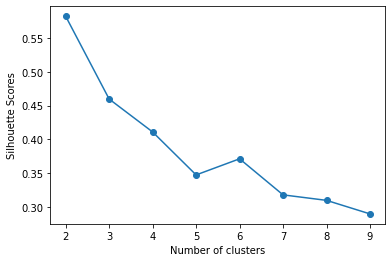

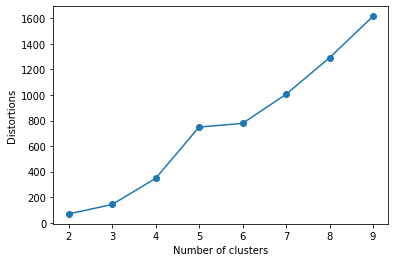

time: 313 ms (started: 2021-01-10 03:56:05 +00:00)


In [ ]:
Optimal_K = {
    'Cluster by Call Category': 3,
    'Cluster by Response Time': 4,
    'Cluster by Call Frequency': 3,
    'Cluster by Socioeconomic Metrics': 3,
}
# sil = sil_call; distortions = distortions_call
# sil = sil_response; distortions = distortions_response
# sil = sil_freq; distortions = distortions_freq
# sil = sil_socioeco; distortions = distortions_socioeco
sil = sil_all; distortions = distortions_all



plt.plot(range(2, 10), sil, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Scores')
plt.show()

plt.plot(range(2, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

In [ ]:
!rm -rf exports/Hierarchical
!mkdir exports/Hierarchical

from sklearn.cluster import AgglomerativeClustering
for i in tqdm(range(2,10)):
  '''
  Cluster by Call
  '''
  A_Clusters = AgglomerativeClustering(n_clusters=i).fit(call_df.loc[:,"Air Quality":"Zoning"])
  print(A_Clusters.labels_)
  master_df['Cluster by Call Category'] = A_Clusters.labels_ + 1
  # display(master_df.groupby('Cluster by Category').size().to_frame('count'))
  '''
  Response Time (Days to Close) Clustering
  '''
  A_Clusters = AgglomerativeClustering(n_clusters=i).fit(response_df.iloc[:,:-5])
  master_df['Cluster by Response Time'] = A_Clusters.labels_ + 1
  # display(master_df.groupby('Cluster by Response Time').size().to_frame('count'))
  
  '''
  Call Frequency (Days to Close) Clustering
  '''
  A_Clusters = AgglomerativeClustering(n_clusters=i).fit(freq_df['Frequency'].values.reshape(-1, 1) )
  master_df['Cluster by Call Frequency'] = A_Clusters.labels_ + 1
  # display(master_df.groupby('Cluster by Call Frequency').size().to_frame('count'))
  
  '''
  Socio Economic Clustering
  '''
  A_Clusters = AgglomerativeClustering(n_clusters=i).fit(df_2019_valid.loc[:,'Total population':'Household_Type'].astype(int))
  A_Clusters.labels_
  master_df['Cluster by Socioeconomic Metrics'] = A_Clusters.labels_ + 1


  '''
  All-factor Clustering
  '''
  A_Clusters = AgglomerativeClustering(n_clusters=i).fit(master_df[['Cluster by Call Category', 'Cluster by Response Time', 'Cluster by Call Frequency', 'Cluster by Socioeconomic Metrics']])
  master_df['Cluster by All Factors'] = A_Clusters.labels_ + 1
  # display(master_df.groupby('Cluster by All Factors').size().to_frame('count')).
  master_df = master_df.sort_values('Cluster by Call Category')
  master_df.to_csv('exports/Hierarchical/230BG-{}clusters-Hierarchical.csv'.format(str(i)), index = False)
  with open('exports/Hierarchical/230BG-{}clusters-Hierarchical.json'.format(i), 'w') as f:
    bg_dict = master_df.to_dict('index')
    bg_dict['Cluster_Total'] = i
    f.write(json.dumps(bg_dict))
  # break

  # break

[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1
 1 1 0 0 0 0 0]
[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 0 2 2 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 0 2 0 0 0 2 0 0 0 0 2 2 2 2 2 2 2 2 0 1 0 0 1 1 1 1 1 0 1
 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 2 0 0 0 0 0 2 0 0 0
 2 2 0 2 2 2 2 2 2 0 1 2 0 0 1 1 0 1 1 1 1 1 1 1 0 0 2 0 0 0 2 1 1 1 1 0 1
 1 1 0 0 2 0 0]
[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1

In [ ]:
!rm -rf exports/OPTICS
!mkdir exports/OPTICS

TOTAL_BG = len(master_df)

from sklearn.cluster import OPTICS
for i in tqdm(range(2,10)):
  '''
  Cluster by Call
  '''
  # A_Clusters = OPTICS(min_samples=20).fit(call_df.loc[:,"Air Quality":"Zoning"])
  # print(A_Clusters.labels_)
  # master_df['Cluster by Call Category'] = A_Clusters.labels_ + 1
  # display(master_df.groupby('Cluster by Call Category').size().to_frame('count'))
  '''
  Response Time (Days to Close) Clustering
  '''
  A_Clusters = OPTICS(min_samples=10).fit(response_df.iloc[:,:-5])
  master_df['Cluster by Response Time'] = A_Clusters.labels_ + 1
  display(master_df.groupby('Cluster by Response Time').size().to_frame('count'))
  
  '''
  Call Frequency (Days to Close) Clustering
  '''
  A_Clusters = OPTICS(min_samples=10).fit(freq_df['Frequency'].values.reshape(-1, 1) )
  master_df['Cluster by Call Frequency'] = A_Clusters.labels_ + 1
  display(master_df.groupby('Cluster by Call Frequency').size().to_frame('count'))
  
  '''
  Socio Economic Clustering
  '''
  A_Clusters = OPTICS(min_samples=10).fit(df_2019_valid.loc[:,'Total population':'Household_Type'].astype(int))
  A_Clusters.labels_
  master_df['Cluster by Socioeconomic Metrics'] = A_Clusters.labels_ + 1


  '''
  All-factor Clustering
  '''
  A_Clusters = OPTICS(min_samples=10).fit(master_df[['Cluster by Call Category', 'Cluster by Response Time', 'Cluster by Call Frequency', 'Cluster by Socioeconomic Metrics']])
  master_df['Cluster by All Factors'] = A_Clusters.labels_ + 1
  # display(master_df.groupby('Cluster by All Factors').size().to_frame('count')).

  # master_df.to_csv('exports/Hierarchical/230BG-{}clusters-OPTICS.csv'.format(str(i)), index = False)
  # with open('exports/Hierarchical/230BG-{}clusters-OPTICS.json'.format(i), 'w') as f:
  #   bg_dict = master_df.to_dict('index')
  #   bg_dict['Cluster_Total'] = i
  #   f.write(json.dumps(bg_dict))
  break

  # break

,count
Cluster by Call Frequency,
0,132
1,15
2,14
3,14
4,10
5,10
6,17
7,17


time: 1.04 s (started: 2021-01-10 23:20:52 +00:00)


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_optics.py:802: RuntimeWarning:

divide by zero encountered in true_divide



In [ ]:
int((0.8/i) * TOTAL_BG)

91

time: 3.01 ms (started: 2021-01-10 23:12:54 +00:00)


In [ ]:
call_df.to_csv('exports/230BG-groupby-CATEGORY.csv', index = False)
response_df.to_csv('exports/230BG-groupby-RESPONSE_TIME.csv', index = False)
freq_df.to_csv('exports/230BG-groupby-CALL_FREQUENCY.csv', index = False)
merged_df.to_csv('exports/230BG-all_info.csv', index = False)



time: 129 ms (started: 2021-01-11 00:52:52 +00:00)


updating: exports/ (stored 0%)
updating: exports/230BG-groupby-CALL_FREQUENCY.csv (deflated 81%)
updating: exports/KMeans/ (stored 0%)
updating: exports/KMeans/230BG-8clusters-KMeans.csv (deflated 77%)
updating: exports/KMeans/230BG-4clusters-KMeans.json (deflated 81%)
updating: exports/KMeans/230BG-6clusters-KMeans.csv (deflated 77%)
updating: exports/KMeans/230BG-2clusters-KMeans.json (deflated 83%)
updating: exports/KMeans/230BG-6clusters-KMeans.json (deflated 81%)
updating: exports/KMeans/230BG-2clusters-KMeans.csv (deflated 80%)
updating: exports/KMeans/230BG-8clusters-KMeans.json (deflated 81%)
updating: exports/KMeans/230BG-7clusters-KMeans.json (deflated 81%)
updating: exports/KMeans/230BG-9clusters-KMeans.csv (deflated 77%)
updating: exports/KMeans/230BG-7clusters-KMeans.csv (deflated 77%)
updating: exports/KMeans/230BG-5clusters-KMeans.csv (deflated 77%)
updating: exports/KMeans/230BG-5clusters-KMeans.json (deflated 81%)
updating: exports/KMeans/230BG-3clusters-KMeans.csv (de

# Cluster Profiling

In [2]:
!mkdir data/
!cp "/content/gdrive/MyDrive/Colab Notebooks/NSF-SCC Project/Neighborhood Data/bg230_clusters.zip" ./
!unzip bg230_clusters.zip -d data/

Archive:  bg230_clusters.zip
   creating: data/exports/
  inflating: data/exports/230BG-groupby-CALL_FREQUENCY.csv  
   creating: data/exports/KMeans/
  inflating: data/exports/KMeans/230BG-8clusters-KMeans.csv  
  inflating: data/exports/KMeans/230BG-4clusters-KMeans.json  
  inflating: data/exports/KMeans/230BG-6clusters-KMeans.csv  
  inflating: data/exports/KMeans/230BG-2clusters-KMeans.json  
  inflating: data/exports/KMeans/230BG-6clusters-KMeans.json  
  inflating: data/exports/KMeans/230BG-2clusters-KMeans.csv  
  inflating: data/exports/KMeans/230BG-8clusters-KMeans.json  
  inflating: data/exports/KMeans/230BG-7clusters-KMeans.json  
  inflating: data/exports/KMeans/230BG-9clusters-KMeans.csv  
  inflating: data/exports/KMeans/230BG-7clusters-KMeans.csv  
  inflating: data/exports/KMeans/230BG-5clusters-KMeans.csv  
  inflating: data/exports/KMeans/230BG-5clusters-KMeans.json  
  inflating: data/exports/KMeans/230BG-3clusters-KMeans.csv  
  inflating: data/exports/KMeans/230B

In [12]:
import pandas as pd

allinfo_df = pd.read_csv('data/exports/230BG-all_info.csv')
allinfo_df.index = allinfo_df['BLOCKGROUP_ID']
allinfo_df.head()

,Air Quality,Animal,Animals / Pets,Aviation,Boulevard Parks and Rec,Bridge,Bulky Appointment,Capital Projects,City Clerks Office,City Facilities,City Managers Office,City Planning & Development,Cleaning,Consumer Services,Convention & Entertainment Center,Data Not Available,Ditch,Downtown Parking,Facilities,Finance,Fire,Food Protection,Government,Graffiti,Guard Rail,Health,Housing,Information Request,Information Technology,Law,Lights / Signals,Maintenance,Markings,Mayors Office,Mowing / Weeds,Municipal Court,Neighborhood & Community Services,Neighborhood Preservation,Noise Control,Nuisance Violations,...,Traffic Study,Trash,Trash / Recycling,Trees,Vehicle,Vehicles / Parking,Wastewater,Water,Water Leak,Water Main Break,Water Quality,Water Services,Weeds,Zoning,Frequency,On time (0-day delay),1 day,2 days,7-day window,14-day window,30-day window,60-day window,90-day window,120-day window,180-day window,365-day window,365+ -day window,BLOCKGROUP_ID,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type,Boundaries
BLOCKGROUP_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
290950003001,0.001205,0.046577,0.028308,0.0,0.0,0.000803,0.008834,0.002008,0.0,0.000402,0.001205,0.0,0.005822,0.000803,0.0,0.000201,0.000201,0.001606,0.000201,0.0,0.000402,0.001606,0.002208,0.003614,0.000201,0.002208,0.0,0.0,0.0,0.0,0.019072,0.005421,0.001405,0.0,0.015057,0.0,0.001004,0.001004,0.000602,0.018269,...,0.003614,0.146155,0.149769,0.048183,0.022887,0.020679,0.0,0.028709,0.035937,0.000000,0.001405,0.003413,0.004015,0.003011,3.268373,0.121,0.255,0.094,0.206,0.091,0.078,0.056,0.022,0.013,0.018,0.026,0.021,290950003001,1524,27778.0,165800.0,332,742,502,63,208,89,540,730,"[[39.10841799999887, -94.567435], [39.10850499..."
290950006001,0.000508,0.094416,0.058883,0.0,0.0,0.000000,0.017513,0.000254,0.0,0.000000,0.000254,0.0,0.006599,0.001523,0.0,0.000254,0.000254,0.000254,0.000000,0.0,0.000000,0.001523,0.000254,0.011675,0.000254,0.000761,0.0,0.0,0.0,0.0,0.006599,0.004061,0.000254,0.0,0.013959,0.0,0.000000,0.001015,0.000254,0.016244,...,0.003046,0.087817,0.096193,0.071574,0.033249,0.049492,0.0,0.026396,0.037056,0.000000,0.001015,0.001523,0.005076,0.001269,3.185125,0.104,0.209,0.074,0.208,0.080,0.072,0.052,0.031,0.030,0.034,0.049,0.058,290950006001,1237,26500.0,56700.0,36,405,0,253,567,86,227,418,"[[39.11992799999887, -94.51357], [39.120062999..."
290950006002,0.000752,0.091610,0.056057,0.0,0.0,0.000000,0.012792,0.002069,0.0,0.000000,0.001129,0.0,0.007148,0.000941,0.0,0.001505,0.000000,0.000000,0.000000,0.0,0.000188,0.000188,0.001129,0.015613,0.000000,0.003762,0.0,0.0,0.0,0.0,0.003386,0.004515,0.000000,0.0,0.007901,0.0,0.000941,0.001505,0.000188,0.032355,...,0.002634,0.091798,0.082769,0.054929,0.035741,0.049850,0.0,0.025771,0.031791,0.000188,0.000941,0.001693,0.004327,0.001881,2.721966,0.101,0.196,0.055,0.223,0.076,0.069,0.046,0.040,0.020,0.035,0.060,0.080,290950006002,1953,37157.0,42300.0,72,677,423,96,739,214,311,532,"[[39.10884399999888, -94.518821], [39.10882099..."
290950006003,0.000464,0.088781,0.059342,0.0,0.0,0.000000,0.010663,0.001623,0.0,0.000000,0.001159,0.0,0.011590,0.000000,0.0,0.001159,0.000000,0.000695,0.000000,0.0,0.000464,0.003941,0.000695,0.010663,0.000000,0.004636,0.0,0.0,0.0,0.0,0.007650,0.005331,0.000000,0.0,0.010895,0.0,0.000464,0.001623,0.001854,0.028512,...,0.002318,0.091794,0.087158,0.046824,0.025962,0.033611,0.0,0.024339,0.030598,0.000000,0.000695,0.001391,0.006027,0.006722,9.694382,0.100,0.214,0.067,0.210,0.080,0.065,0.051,0.032,0.016,0.038,0.061,0.068,290950006003,445,56150.0,46900.0,9,40,0,11,394,80,73,117,"[[39.10884599999886, -94.518905], [39.10854399..."
290950006004,0.000250,0.085372,0.062157,0.0,0.0,0.000000,0.019970,0.001248,0.0,0.000000,0.001747,0.0,0.007239,0.000999,0.0,0.000250,0.000000,0.000000,0.000000,0.0,

time: 147 ms (started: 2021-01-14 09:39:32 +00:00)


In [11]:
sub_df = allinfo_df.loc[:, 'Air Quality': 'Zoning']
sub_df.describe()

,Air Quality,Animal,Animals / Pets,Aviation,Boulevard Parks and Rec,Bridge,Bulky Appointment,Capital Projects,City Clerks Office,City Facilities,City Managers Office,City Planning & Development,Cleaning,Consumer Services,Convention & Entertainment Center,Data Not Available,Ditch,Downtown Parking,Facilities,Finance,Fire,Food Protection,Government,Graffiti,Guard Rail,Health,Housing,Information Request,Information Technology,Law,Lights / Signals,Maintenance,Markings,Mayors Office,Mowing / Weeds,Municipal Court,Neighborhood & Community Services,Neighborhood Preservation,Noise Control,Nuisance Violations,...,Permit,Pothole,Property & Nuisance Violations,Property / Buildings / Construction,Property Preservation,Property Violations,Public Health,Public Safety,Public Works,Right of Way,Sealing,Sewer,Sidewalk,Sidewalks / Curbs / Ditch,Signal,Signs,Snow & Ice,Steel Plate,Storm Water,Storm Water / Sewer,Street,Street Light,Street Sign,Streets / Roadways / Alleys,Sweeping,Traffic Sign,Traffic Study,Trash,Trash / Recycling,Trees,Vehicle,Vehicles / Parking,Wastewater,Water,Water Leak,Water Main Break,Water Quality,Water Services,Weeds,Zoning
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.0,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,2.290000e+02,229.000000,2.290000e+02,229.000000,229.000000,229.000000,229.000000,...,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,0.000959,0.063527,0.052583,0.000012,0.000027,0.000308,0.012916,0.003495,0.0,0.000184,0.001466,0.000155,0.001703,0.000446,0.000022,0.000576,0.000433,0.002431,0.000148,0.000010,0.000254,0.002107,0.001965,0.003141,0.000030,0.004308,0.000011,0.000004,0.000007,0.000002,0.018935,0.005905,0.000631,9.213974e-07,0.019779,4.541485e-07,0.000964,0.000825,0.001249,0.023371,...,0.001910,0.007712,0.014136,0.042402,0.000483,0.102475,0.011551,0.002405,0.014136,0.001740,0.000089,0.013808,0.002937,0.007518,0.009481,0.012623,0.011431,0.001435,0.010245,0.023591,0.001151,0.013598,0.007558,0.048744,0.000074,0.003421,0.004266,0.094273,0.108515,0.059076,0.015794,0.019648,0.000037,0.034105,0.045361,0.000069,0.002448,0.003685,0.008381,0.002269
std,0.001782,0.024568,0.022834,0.000072,0.000118,0.001145,0.005745,0.003819,0.0,0.000891,0.001557,0.000321,0.002698,0.000514,0.000186,0.000583,0.001385,0.011200,0.000656,0.000059,0.000360,0.003939,0.003038,0.004339,0.000115,0.002643,0.000056,0.000028,0.000067,0.000019,0.017459,0.002610,0.001696,1.394327e-05,0.012410,6.872513e-06,0.001300,0.000640,0.002036,0.015303,...,0.001939,0.006725,0.008432,0.019650,0.000623,0.052276,0.012191,0.003288,0.004915,0.001236,0.000227,0.005457,0.002156,0.007177,0.012367,0.009527,0.007466,0.001701,0.005928,0.011630,0.001016,0.007854,0.007290,0.031824,0.000157,0.002721,0.004181,0.026851,0.037331,0.040276,0.009484,0.010066,0.000119,0.012806,0.014303,0.000153,0.002380,0.002379,0.008865,0.001656
min,0.000000,0.020941,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002586,0.000885,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000401,0.000000,0.006658,0.000000,0.008605,0.000436,0.000000,0.002689,0.000000,0.000000,0.003141,0.000000,0.000563,0.000

time: 301 ms (started: 2021-01-14 09:36:14 +00:00)


In [26]:
import pandas as pd
import json
from tqdm.notebook import tqdm
cluster_columns = ['Cluster by Call Category', 'Cluster by Response Time', 'Cluster by Call Frequency', 'Cluster by Socioeconomic Metrics', 'Cluster by All Factors']
for i in tqdm(range(2,10)):
  df = pd.read_csv('data/exports/KMeans/230BG-{}clusters-KMeans.csv'.format(str(i)))

  max_num = df['Cluster by Call Category'].max()
  print(max_num)
  # display(df.describe())
  with open('data/exports/KMeans/230BG-{}clusters-KMeans.json'.format(i), 'r') as f:
        clusters_ann = json.load(f)
        clusters_ann['Cluster_Profiles'] = {}
  for col in cluster_columns:
    print(col)
    

    cluster_profiles = []
    for i in range(1,max_num+1):
      print(i)
      cluster_members = df[df[col] == i]['BLOCKGROUP_ID'].values.tolist()

      if 'Call Category' in col:
        sub_df = allinfo_df.copy().loc[:, 'Air Quality': 'Zoning'].multiply(100)
      elif 'Response Time' in col:
        sub_df = allinfo_df.copy().loc[:, 'On time (0-day delay)': '365+ -day window'].multiply(100)
      elif 'Call Frequency' in col:
        sub_df = allinfo_df.copy().loc[:, 'Frequency'].multiply(100)
      elif 'Socioeconomic' in col:
        sub_df = allinfo_df.copy().loc[:, 'Total population': 'Household_Type']
      else:
        sub_df = allinfo_df.copy().loc[:, 'Total population': 'Household_Type']

      single_df = sub_df[sub_df.index.isin(cluster_members)]
      # display(single_df.head())
      if len(single_df) > 1:
        profile_df = single_df.describe(include='all')#.astype(int)
      else:
        profile_df = single_df.describe(include='all').fillna('N/A')

      if 'Call Category' in col:
        profile_df = profile_df.sort_values(by = 'mean', axis = 1, ascending = False)
      display(profile_df)
      
      profile_dict = profile_df.to_dict()
      profile_dict['Cluster_ID'] = i
      cluster_profiles.append(profile_dict)
    clusters_ann['Cluster_Profiles'][col] = cluster_profiles
    # with open('data/exports/KMeans/230BG-{}clusters-KMeans.json'.format(i), 'w') as f:
    #     f.write(json.dumps(clusters_ann))
    # break
  break


2
Cluster by Call Category
1


,Property Violations,Trash / Recycling,Trash,Animal,Animals / Pets,Property / Buildings / Construction,Trees,Water Leak,Streets / Roadways / Alleys,Nuisance Violations,Water,Mowing / Weeds,Vehicles / Parking,Property & Nuisance Violations,Storm Water / Sewer,Vehicle,Public Works,Bulky Appointment,Sewer,Snow & Ice,Weeds,Lights / Signals,Street Light,Signs,Public Health,Storm Water,Maintenance,Signal,Parks & Recreation,Health,Pothole,Street Sign,Sidewalks / Curbs / Ditch,Graffiti,Water Services,Traffic Sign,Capital Projects,Traffic Study,Park,Sidewalk,...,Government,Right of Way,Permit,City Managers Office,Food Protection,Neighborhood Preservation,Neighborhood & Community Services,Steel Plate,Street,Data Not Available,Noise Control,Property Preservation,Air Quality,Consumer Services,Ditch,Downtown Parking,Fire,Park Maintenance,Markings,Bridge,City Planning & Development,Sweeping,Sealing,Facilities,City Facilities,Water Main Break,Boulevard Parks and Rec,Wastewater,Guard Rail,Housing,Information Technology,Information Request,Finance,Aviation,Mayors Office,Convention & Entertainment Center,Law,City Clerks Office,Municipal Court,Parking Meter
count,149.00000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,...,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.0,149.0,149.0,149.0
mean,13.35971,11.367036,10.300358,7.448954,6.368872,4.988523,4.549216,4.137050,3.205622,3.092697,2.903417,2.393184,2.078624,1.861450,1.847254,1.508103,1.449464,1.398989,1.260058,1.191181,1.188050,1.093056,1.010319,0.880736,0.844644,0.790326,0.525464,0.465134,0.464799,0.460615,0.451454,0.437089,0.410368,0.315187,0.304200,0.283797,0.268685,0.262878,0.262332,0.218180,...,0.155176,0.146297,0.128351,0.119054,0.113684,0.096715,0.096388,0.087151,0.085943,0.074142,0.071409,0.068684,0.064178,0.052250,0.046769,0.026169,0.021780,0.020995,0.019159,0.011252,0.009621,0.007491,0.007308,0.007140,0.006833,0.006006,0.003428,0.002677,0.002385,0.001728,0.000552,0.000550,0.000519,0.000247,0.000142,0.000085,0.0,0.0,0.0,0.0
std,3.42381,2.522961,1.767919,1.880074,1.889693,1.817793,1.912238,1.272467,1.650388,1.323773,1.006137,1.246979,0.910159,0.660852,0.640847,0.890493,0.450479,0.426114,0.463942,0.784011,0.904136,0.584638,0.434400,0.426649,0.599895,0.380476,0.229940,0.472050,0.725308,0.269020,0.313669,0.260134,0.274309,0.457219,0.198143,0.215634,0.302959,0.189605,0.361746,0.130016,...,0.124318,0.094942,0.111810,0.097333,0.185028,0.055444,0.091860,0.076463,0.086186,0.061334,0.100209,0.067184,0.065714,0.057406,0.153087,0.078003,0.028672,0.053546,0.037801,0.031888,0.017436,0.015898,0.016624,0.017307,0.027282,0.013710,0.013699,0.009286,0.008386,0.006914,0.004752,0.003442,0.003645,0.002180,0.001729,0.001032,0.0,0.0,0.0,0.0
min,6.53800,6.074800,5.485900,3.423800,2.429100,1.391600,1.327400,1.995300,1.175500,1.077400,1.367100,0.564600,0.391800,0.365400,0.694200,0.281400,0.494600,0.309300,0.356300,0.147700,0.000000,0.258600,0.235100,0.218000,0.043600,0.170900,0.088500,0.000000,0.000000,0.000000,0.040100,0.092800,0.056300,0.000000,0.071700,0.000000,0.000000,0.046400,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

2


,Trash / Recycling,Trees,Streets / Roadways / Alleys,Trash,Water Leak,Property Violations,Water,Animal,Lights / Signals,Storm Water / Sewer,Animals / Pets,Property / Buildings / Construction,Street Light,Signs,Signal,Vehicles / Parking,Public Health,Vehicle,Sewer,Storm Water,Sidewalks / Curbs / Ditch,Pothole,Street Sign,Public Works,Mowing / Weeds,Bulky Appointment,Snow & Ice,Parks & Recreation,Nuisance Violations,Traffic Study,Maintenance,Downtown Parking,Park,Property & Nuisance Violations,Capital Projects,Water Services,Traffic Sign,Sidewalk,Food Protection,Health,...,Government,Zoning,Steel Plate,Right of Way,Noise Control,City Managers Office,Weeds,Street,Air Quality,Markings,Neighborhood & Community Services,Cleaning,Park Maintenance,Bridge,Neighborhood Preservation,City Facilities,Ditch,Fire,Consumer Services,Facilities,Data Not Available,City Planning & Development,Sealing,Property Preservation,Parking Meter,Water Main Break,Sweeping,Convention & Entertainment Center,Wastewater,Guard Rail,Aviation,Finance,Boulevard Parks and Rec,Information Technology,Law,Municipal Court,Housing,Information Request,Mayors Office,City Clerks Office
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.0,80.0,80.0,80.0
mean,9.891174,8.437459,7.982360,7.801176,5.279406,4.450878,4.354989,4.310885,3.384299,3.312536,3.189950,2.846455,2.010605,1.972966,1.847536,1.752685,1.733260,1.712191,1.605630,1.460569,1.387639,1.366826,1.349309,1.346709,1.204438,1.091715,1.053676,0.957999,0.929736,0.731607,0.711619,0.647070,0.580771,0.579581,0.500026,0.488210,0.450663,0.434280,0.391527,0.375246,...,0.273422,0.253045,0.248543,0.225617,0.224433,0.197944,0.186176,0.169307,0.154840,0.144841,0.096402,0.084407,0.073315,0.067151,0.055926,0.040034,0.036858,0.032155,0.030374,0.029145,0.026849,0.026474,0.011952,0.010255,0.009894,0.008424,0.007130,0.006135,0.005562,0.004118,0.003000,0.001884,0.001419,0.001038,0.000466,0.000130,0.0,0.0,0.0,0.0
std,5.182670,5.477769,3.015372,3.291937,1.418186,2.148066,1.203501,2.076024,2.167447,1.311297,1.303705,1.389130,0.876127,1.221723,1.654414,1.141147,1.759190,1.040748,0.614417,0.668570,0.846325,0.754313,0.926658,0.556825,0.774978,0.741654,0.666881,1.510967,0.626959,0.540741,0.273257,1.831655,0.777832,0.388957,0.462389,0.259738,0.329079,0.267719,0.576802,0.247468,...,0.477694,0.195598,0.235252,0.151757,0.292280,0.219387,0.274203,0.106295,0.279593,0.264522,0.181564,0.168049,0.162232,0.184050,0.070369,0.144238,0.106780,0.046097,0.033488,0.107419,0.036103,0.047070,0.030907,0.022555,0.034958,0.017844,0.015494,0.031243,0.015544,0.015810,0.011664,0.008708,0.007011,0.009280,0.003211,0.001163,0.0,0.0,0.0,0.0
min,0.451500,0.723100,2.668400,0.315200,3.034900,0.860500,2.430900,2.094100,0.530600,0.628100,1.428600,0.665800,0.747200,0.151700,0.041900,0.061000,0.053800,0.183100,0.314100,0.125600,0.062800,0.149000,0.279000,0.268900,0.000000,0.000000,0.110700,0.000000,0.000000,0.107100,0.236000,0.000000,0.000000,0.000000,0.067000,0.000000,0.000000,0.000000,0.000000,0.032500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

Cluster by Response Time
1


,On time (0-day delay),1 day,2 days,7-day window,14-day window,30-day window,60-day window,90-day window,120-day window,180-day window,365-day window,365+ -day window
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,8.633333,18.005556,8.400000,26.350000,11.066667,10.405556,7.655556,3.433333,1.694444,1.638889,1.733333,1.000000
std,1.001176,2.534578,1.334607,3.071357,0.887826,1.371333,1.466979,0.641689,0.373335,0.599155,0.574968,0.631525
min,7.100000,15.600000,6.700000,21.000000,9.200000,8.000000,5.700000,2.100000,0.700000,0.100000,1.000000,0.300000
25%,8.050000,16.600000,7.300000,24.250000,10.325000,9.100000,6.675000,3.225000,1.500000,1.425000,1.425000,0.525000
50%,8.800000,16.850000,8.250000,26.950000,11.200000,10.900000,7.450000,3.500000,1.700000,1.700000,1.500000,0.800000
75%,9.150000,18.375000,9.000000,28.825000,11.725000,11.475000,7.975000,3.800000,1.800000,1.900000,1.875000,1.175000
max,10.200000,23.500000,11.900000,30.700000,12.200000,12.100000,11.700000,4.600000,2.300000,2.800000,3.200000,2.400000


2


,On time (0-day delay),1 day,2 days,7-day window,14-day window,30-day window,60-day window,90-day window,120-day window,180-day window,365-day window,365+ -day window
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,9.941706,20.952607,7.326066,21.362085,9.035545,8.456398,6.186256,3.228910,2.172038,2.873934,4.123223,4.321801
std,1.821529,2.582916,1.135628,3.069696,1.294059,1.209760,1.128653,0.736251,0.544868,0.865824,1.518421,2.255807
min,6.800000,13.700000,4.700000,15.100000,6.400000,5.300000,3.400000,1.500000,0.800000,1.000000,1.000000,0.500000
25%,9.000000,19.100000,6.400000,18.950000,8.200000,7.700000,5.400000,2.800000,1.800000,2.200000,2.950000,2.400000
50%,9.800000,21.300000,7.200000,20.900000,8.800000,8.300000,6.000000,3.200000,2.100000,2.900000,4.200000,4.300000
75%,10.500000,22.750000,8.300000,23.300000,9.600000,9.100000,6.850000,3.500000,2.500000,3.500000,5.200000,6.100000
max,26.400000,28.800000,10.500000,30.400000,15.100000,14.000000,10.600000,6.800000,3.600000,6.700000,9.700000,10.300000


Cluster by Call Frequency
1


count      60.000000
mean      780.066299
std       190.197913
min       567.335766
25%       652.031014
50%       745.810196
75%       857.036924
max      1620.089286
Name: Frequency, dtype: float64

2


count    169.000000
mean     346.286237
std      115.122151
min       70.849057
25%      267.948718
50%      347.272727
75%      422.693267
max      557.095710
Name: Frequency, dtype: float64

Cluster by Socioeconomic Metrics
1


,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type
count,211.000000,211.000000,2.110000e+02,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,910.270142,48105.270142,1.382813e+05,221.066351,377.127962,360.454976,23.165877,120.777251,89.379147,231.767773,411.748815
std,382.033616,33836.622982,1.471920e+05,259.837486,387.490261,334.656685,45.032009,191.529241,64.415159,197.251394,202.489690
min,290.000000,10680.000000,9.999000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.000000
25%,633.000000,26967.500000,5.170000e+04,38.000000,79.000000,66.000000,0.000000,16.000000,44.000000,106.000000,272.000000
50%,822.000000,39375.000000,8.600000e+04,99.000000,228.000000,322.000000,0.000000,50.000000,84.000000,172.000000,376.000000
75%,1104.500000,55656.000000,1.689500e+05,371.500000,605.500000,539.500000,25.500000,150.500000,131.500000,305.500000,490.000000
max,2485.000000,250001.000000,1.035700e+06,1501.000000,2360.000000,1651.000000,271.000000,1276.000000,382.000000,1233.000000,1496.000000


2


,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,913.888889,54437.444444,131972.222222,246.611111,445.611111,176.333333,30.111111,227.111111,78.388889,160.111111,376.833333
std,390.227519,31370.200425,111538.122238,260.932297,353.751182,207.678201,33.835048,253.284515,67.225817,119.910206,149.362272
min,437.000000,18618.000000,26500.000000,9.000000,27.000000,0.000000,0.000000,13.000000,0.000000,9.000000,165.000000
25%,623.750000,37298.500000,41400.000000,36.500000,205.750000,33.750000,1.250000,56.750000,25.250000,75.500000,253.250000
50%,829.500000,44881.000000,98200.000000,116.000000,320.000000,83.500000,10.500000,100.500000,67.500000,140.500000,355.500000
75%,1216.000000,64758.250000,193950.000000,465.750000,658.750000,337.750000,50.000000,317.500000,116.750000,190.250000,488.250000
max,1953.000000,137024.000000,386200.000000,735.000000,1180.000000,668.000000,96.000000,828.000000,214.000000,471.000000,750.000000


Cluster by All Factors
1


,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type
count,149.000000,149.00000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,853.516779,33294.33557,72481.228188,87.295302,191.268456,461.395973,16.986577,155.946309,105.033557,198.389262,351.939597
std,358.995795,12503.13824,44364.596162,112.413120,213.180314,320.272157,43.847399,233.361678,61.086162,121.719589,142.890207
min,290.000000,10680.00000,9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,117.000000
25%,584.000000,24076.00000,44200.000000,29.000000,38.000000,219.000000,0.000000,15.000000,59.000000,117.000000,250.000000
50%,784.000000,32750.00000,56900.000000,49.000000,119.000000,420.000000,0.000000,60.000000,96.000000,167.000000,329.000000
75%,1014.000000,41250.00000,86300.000000,99.000000,250.000000,616.000000,9.000000,190.000000,142.000000,272.000000,418.000000
max,2049.000000,68125.00000,235000.000000,807.000000,1269.000000,1651.000000,271.000000,1276.000000,382.000000,777.000000,985.000000


2


,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type
count,80.000000,80.000000,8.000000e+01,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000
mean,1016.787500,77115.375000,2.594145e+05,475.962500,738.700000,131.025000,36.23750,79.200000,57.750000,277.812500,515.287500
std,402.159509,41297.795792,1.832093e+05,266.556924,380.061168,223.668662,42.43871,88.255154,59.698292,275.111719,241.283813
min,510.000000,11920.000000,4.230000e+04,10.000000,93.000000,0.000000,0.00000,0.000000,0.000000,0.000000,185.000000
25%,734.500000,49301.500000,1.582750e+05,299.000000,504.750000,16.500000,5.00000,20.000000,0.000000,68.750000,369.000000
50%,950.500000,67766.000000,2.008000e+05,445.500000,684.000000,47.000000,24.00000,49.000000,48.000000,191.500000,469.000000
75%,1200.750000,95291.750000,2.804500e+05,589.000000,922.000000,122.750000,53.00000,97.000000,84.500000,438.000000,639.750000
max,2485.000000,250001.000000,1.035700e+06,1501.000000,2360.000000,1027.000000,210.00000,458.000000,206.000000,1233.000000,1496.000000


time: 1.19 s (started: 2021-01-14 09:50:56 +00:00)


In [85]:
with open('data/exports/KMeans/230BG-{}clusters-KMeans.json'.format('9'), 'r') as f:
        clusters_ann = json.load(f)
clusters_ann['Cluster_Profiles']['Cluster by Response Time'][-1]

{'Asian alone': {'25%': 17,
  '50%': 24,
  '75%': 47,
  'count': 5,
  'max': 64,
  'mean': 30,
  'min': 0,
  'std': 25},
 'Black or African American alone': {'25%': 33,
  '50%': 82,
  '75%': 326,
  'count': 5,
  'max': 498,
  'mean': 193,
  'min': 26,
  'std': 210},
 'Cluster_ID': 9,
 'Hispanic or Latino': {'25%': 20,
  '50%': 134,
  '75%': 201,
  'count': 5,
  'max': 249,
  'mean': 120,
  'min': 0,
  'std': 109},
 'Household_Type': {'25%': 249,
  '50%': 274,
  '75%': 329,
  'count': 5,
  'max': 679,
  'mean': 341,
  'min': 177,
  'std': 196},
 'Median home value': {'25%': 55800,
  '50%': 64700,
  '75%': 143600,
  'count': 5,
  'max': 460500,
  'mean': 152820,
  'min': 39500,
  'std': 176614},
 'Median income': {'25%': 27422,
  '50%': 29583,
  '75%': 49863,
  'count': 5,
  'max': 113929,
  'mean': 48347,
  'min': 20938,
  'std': 38224},
 'Total Renter Occupied': {'25%': 71,
  '50%': 95,
  '75%': 189,
  'count': 5,
  'max': 586,
  'mean': 188,
  'min': 0,
  'std': 232},
 'Total Vacant':

time: 27.2 ms (started: 2021-01-13 10:23:42 +00:00)


In [64]:
single_df.describe().fillna('N/A')

,Total population,Median income,Median home value,Total population age 25+ years with a bachelor's degree or higher,White alone,Black or African American alone,Asian alone,Hispanic or Latino,Total Vacant,Total Renter Occupied,Household_Type
count,1,1,1,1,1,1,1,1,1,1,1
mean,1237,55385,189300,589,882,122,79,109,141,471,750
std,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
min,1237,55385,189300,589,882,122,79,109,141,471,750
25%,1237,55385,189300,589,882,122,79,109,141,471,750
50%,1237,55385,189300,589,882,122,79,109,141,471,750
75%,1237,55385,189300,589,882,122,79,109,141,471,750
max,1237,55385,189300,589,882,122,79,109,141,471,750


time: 65.4 ms (started: 2021-01-13 10:19:37 +00:00)


In [86]:
# !mkdir "/content/gdrive/MyDrive/Colab Notebooks/NSF-SCC Project/Neighborhood Data/exports"
!zip -r bg230_clusters.zip data/exports
!cp bg230_clusters.zip "/content/gdrive/MyDrive/Colab Notebooks/NSF-SCC Project/Neighborhood Data/"

  adding: data/exports/ (stored 0%)
  adding: data/exports/230BG-all_info.csv (deflated 77%)
  adding: data/exports/KMeans/ (stored 0%)
  adding: data/exports/KMeans/230BG-7clusters-KMeans.csv (deflated 77%)
  adding: data/exports/KMeans/230BG-3clusters-KMeans.json (deflated 82%)
  adding: data/exports/KMeans/230BG-2clusters-KMeans.json (deflated 84%)
  adding: data/exports/KMeans/230BG-3clusters-KMeans.csv (deflated 78%)
  adding: data/exports/KMeans/230BG-8clusters-KMeans.json (deflated 81%)
  adding: data/exports/KMeans/230BG-5clusters-KMeans.json (deflated 81%)
  adding: data/exports/KMeans/230BG-6clusters-KMeans.csv (deflated 77%)
  adding: data/exports/KMeans/230BG-4clusters-KMeans.json (deflated 81%)
  adding: data/exports/KMeans/230BG-7clusters-KMeans.json (deflated 81%)
  adding: data/exports/KMeans/230BG-6clusters-KMeans.json (deflated 81%)
  adding: data/exports/KMeans/230BG-9clusters-KMeans.csv (deflated 77%)
  adding: data/exports/KMeans/230BG-8clusters-KMeans.csv (deflate